# Проект 1
## Подготовка аналитического отчета с помощью библиотек pandas, matplotlib


<br><br>
**Описание работы:**

Задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ Skillbox эффективно выстраивать стратегию по модернизированию и улучшению курсов. 
В начале отчета необходимо оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


In [1]:
# Блок импорта всех необходимых библиотек
import pandas as pd
import numpy as np
import missingno as msno
import datetime
from pandas.tseries.offsets import DateOffset
import math

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# блок загрузки всех датафреймов
df_courses = pd.read_csv('.\Data\courses.csv')
df_students = pd.read_csv('.\Data\students.csv')
df_course_contents = pd.read_csv('.\Data\course_contents.csv')
df_progresses = pd.read_csv('.\Data\progresses.csv')
df_progress_phases = pd.read_csv('.\Data\progress_phases.csv', parse_dates = ['start_date', 'finish_date'])

Подготовим каждый датафрейм для объединения в один: удалим лишние столбцы, переименуем названия столбцов, чтобы объединение прошло успешно.

In [3]:
# Подготовка df_courses
df_courses.rename(columns={'id': 'course_id'}, inplace=True)
df_courses.drop('Unnamed: 0', axis=1, inplace=True)
df_courses.head()

,course_id,title,field
0,943306102e5b067d08a29094f37b8193,Java-разработчик c нуля,Development
1,17013cd19d25cb3f28dc1b2683721bb9,Веб-дизайн Базовый,Design
2,ac634845fb0350d0e9d49078aaa4b68f,Excel Базовый,Business
3,0770b1b039964228294f1f34b29fc2c1,Руководитель digital-проектов,Business
4,abce125a877c2196a3bc7bfbc11b5fc5,Веб-вёрстка для начинающих 2.0,Development


In [4]:
# Подготовка df_progresses
df_progresses.rename(columns={'id': 'progress_id'}, inplace=True)
df_progresses.head()

,progress_id,student_id,course_id
0,8459fbc07e32ec92bd7b43d7df9bfa89,a6ae278c0eab719b3784e5ea147c128f,0770b1b039964228294f1f34b29fc2c1
1,a9d173142534e33ce39146017f9c6835,e24062de06d301937b3b3a8e383e3e21,bf27a4bf4ada4c756451703ea62a914f
2,da26551a71cd62bbab844e3e54af7f71,35a36d90b745992b59085c8d54a072e7,6e4837f0a65c68efbfdd0594d6774701
3,cda22f5fb5b5dcfad42b59b91b1938dc,37e8e8179295ae764524223086b0b568,abce125a877c2196a3bc7bfbc11b5fc5
4,5ead083521d7f2284a43290c743aa93b,37e8e8179295ae764524223086b0b568,17013cd19d25cb3f28dc1b2683721bb9


На всякий случай подготовим датафрейм df_students.

In [5]:
# Подготовка df_students
df_students.rename(columns={'id': 'student_id'}, inplace=True)
df_students.drop('id_', axis=1, inplace=True)
df_students.head()

,student_id,city,birthday
0,35e8a1938b9a33d5e45c8f4451c4309a,NaN,NaN
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23
2,2033122d7c9b24b36eebc468d5259642,NaN,NaN
3,a6ae278c0eab719b3784e5ea147c128f,Москва,NaN
4,51b25c9afd20d178ef3c07276df38e2d,Великий Новгород,NaN


Объединим массивы **df_courses**, **df_course_contents**, **df_progresses**, **df_progress_phases** в один массив **df_full_descr_of_courses**.

In [6]:
df_full_descr_of_courses_1 = df_courses.merge(df_course_contents, on='course_id', how='left')
df_full_descr_of_courses_2 = df_progress_phases.merge(df_progresses, on='progress_id')
df_full_descr_of_courses = df_full_descr_of_courses_2.merge(df_full_descr_of_courses_1, how='left', 
                                                            on=['course_id', 'lesson_number', 'module_number'])
df_full_descr_of_courses.head()

,progress_id,module_number,lesson_number,status,start_date,finish_date,student_id,course_id,title,field,module_title,lesson_title,lesson_token,is_video,is_homework
0,a387ab916f402cb3fbfffd29f68fd0ce,2,4,done,2018-06-23 08:28:50.681065+00:00,2018-06-23 08:28:52.439542+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Практика — мокапы,7df8adef-1259-4b72-9bf2-353c73389d06,True,False
1,a387ab916f402cb3fbfffd29f68fd0ce,1,1,done,2018-06-20 14:25:21.783762+00:00,2018-06-20 15:45:07.717209+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Интро курса,df1a1f20-cdf7-443d-b25b-0a4b990b84d9,True,False
2,a387ab916f402cb3fbfffd29f68fd0ce,2,2,done,2018-06-23 08:18:09.653771+00:00,2018-06-23 08:18:12.784616+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Концептуальный дизайн,Что такое концептуальный дизайн,f23b1890-9365-406f-816b-04864cefe58f,True,False
3,a387ab916f402cb3fbfffd29f68fd0ce,1,4,done,2018-06-20 16:00:06.361780+00:00,2018-06-21 19:09:30.845034+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Личное позиционирование,9dd50916-4aa6-4a73-b86c-56a1bd7753c8,True,False
4,a387ab916f402cb3fbfffd29f68fd0ce,1,6,done,2018-06-21 19:10:36.957891+00:00,2018-06-28 15:59:25.320418+00:00,768c2987a744c51ce64a5993a2a94eaf,c9fcb746d51e41bc5a217002d081454b,Веб-дизайн PRO 2.0,Design,Специализация и личное позиционирование,Домашняя работа,43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3,False,True


1. Посчитайте
    * общее количество курсов в датасете, 
    * количество модулей на каждом курсе, 
    * количество уроков в каждом модуле на каждом курсе, 
    * медианное количество уроков в модуле на каждом курсе, 
    * количество учеников на каждом курсе
    * минимальный, максимальный, средний, медианный возраст студентов
    * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

Посчитаем общее количество курсов в датасете.

In [7]:
courses_counter = df_full_descr_of_courses['course_id'].nunique()
print('В датасете присутствуют {} курсов'.format(courses_counter))

В датасете присутствуют 15 курсов


Посчитаем количество модулей в каждом курсе.

In [8]:
df_courses_grouped = df_full_descr_of_courses.groupby('title')
course_module_counter = df_courses_grouped['module_title'].nunique()
course_module_counter

title
Excel Базовый                           9
Java-разработчик                       17
Java-разработчик c нуля                 9
JavaScript с нуля                      18
PHP-разработчик с 0 до PRO. Часть 1     8
SMM-маркетолог от А до Я               11
UX-дизайн                              20
Анимация интерфейсов                   21
Веб-вёрстка для начинающих 2.0          8
Веб-дизайн PRO 2.0                     17
Веб-дизайн Базовый                     17
Веб-дизайн с нуля 2.0                  19
Веб-разработчик                        20
Интернет-маркетолог от Ingate          18
Руководитель digital-проектов          17
Name: module_title, dtype: int64

Посчитаем количество уроков в каждом модуле на каждом курсе.

In [9]:
df_courses_modules_grouped = df_full_descr_of_courses.sort_values(by='module_number').groupby(['title', 'module_title'])
module_lesson_counter = df_courses_modules_grouped['lesson_title'].nunique()
module_lesson_counter.head(9)

title          module_title                                               
Excel Базовый   Визуализация данных Excel                                      5
               Основной функционал Excel                                      11
               Основной функционал Excel (продолжение)                         7
               Сводные таблицы Excel                                           5
               Формулы и функции Excel. Более сложные формулы                  5
               Формулы и функции Excel. Введение                               3
               Формулы и функции Excel. Продолжаем работать с формулами        7
               Формулы и функции Excel. Работа с ошибками, проверка данных     5
               Экзаменационная работа                                          1
Name: lesson_title, dtype: int64

Посчитаем **медианное количество уроков** в модуле на каждом курсе.

In [10]:
median_val = df_courses_modules_grouped['lesson_title']\
    .nunique()\
    .reset_index()\
    .rename(columns={'lesson_title': 'lessons_quantity'})\
    .groupby(['title'])['lessons_quantity']\
    .agg(median_val = 'median')
print(median_val)

                                     median_val
title                                          
Excel Базовый                               5.0
Java-разработчик                            7.0
Java-разработчик c нуля                    10.0
JavaScript с нуля                           7.0
PHP-разработчик с 0 до PRO. Часть 1         4.0
SMM-маркетолог от А до Я                    6.0
UX-дизайн                                   3.5
Анимация интерфейсов                        3.0
Веб-вёрстка для начинающих 2.0              7.0
Веб-дизайн PRO 2.0                          5.0
Веб-дизайн Базовый                          3.0
Веб-дизайн с нуля 2.0                       4.0
Веб-разработчик                             2.0
Интернет-маркетолог от Ingate               6.5
Руководитель digital-проектов               5.0


Определим количество учеников на каждом курсе.

In [11]:
course_student_counter = df_courses_grouped['student_id'].nunique()
course_student_counter

title
Excel Базовый                           782
Java-разработчик                        763
Java-разработчик c нуля                 581
JavaScript с нуля                       966
PHP-разработчик с 0 до PRO. Часть 1     854
SMM-маркетолог от А до Я                506
UX-дизайн                              1151
Анимация интерфейсов                    598
Веб-вёрстка для начинающих 2.0         2004
Веб-дизайн PRO 2.0                     1711
Веб-дизайн Базовый                      518
Веб-дизайн с нуля 2.0                  2014
Веб-разработчик                         628
Интернет-маркетолог от Ingate          2168
Руководитель digital-проектов           685
Name: student_id, dtype: int64

Определим минимальный, максимальный, средний, медианный возраст студентов.

In [12]:
# Создадим датафрейм и удалим в нем строки с NaN-ми
df_students_clear = df_students.dropna() 
 # Преобразуем тип дат в столбце ['birthday'] в datetime.date.
born_func = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').date()
df_students_clear['birthday'] = df_students_clear['birthday'].apply(born_func)
df_students_clear.head()

C:\Users\1\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,student_id,city,birthday
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23
7,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15
8,37e8e8179295ae764524223086b0b568,Москва,1987-08-24
11,fb10649db552c5f451bea45ed754d428,Санкт-Петербург,1988-07-16
15,d15a188c90bb4d83957ac14de78fada4,Санкт-Петербург,1991-01-16


In [13]:
# Создадим функцию для определения возраста.
def calculate_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
# Создадим столбец с возрастом каждого студента
df_students_clear['age'] = df_students_clear['birthday'].apply(calculate_age)

# Отсеим данные о студентах задавших некорректный возраст. Будем считать корректным возраст от 11 до 80 лет.
df_students_clear = df_students_clear[(df_students_clear['age'] <= 80) & (df_students_clear['age'] >= 11)]
df_students_clear.head()

C:\Users\1\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,student_id,city,birthday,age
1,6c3e52be632fc50de9640147e4017dcd,Москва,1979-10-23,40
7,35a36d90b745992b59085c8d54a072e7,Красноярск,1991-08-15,29
8,37e8e8179295ae764524223086b0b568,Москва,1987-08-24,33
11,fb10649db552c5f451bea45ed754d428,Санкт-Петербург,1988-07-16,32
15,d15a188c90bb4d83957ac14de78fada4,Санкт-Петербург,1991-01-16,29


Определим минимальный, максимальный, средний, медианный возраст студентов

In [14]:
min_age = df_students_clear['age'].min()
max_age = df_students_clear['age'].max()
mean_age = round(df_students_clear['age'].mean(), 2)
median_age = df_students_clear['age'].median()
print('Минимальный возраст среди студентов - {}'.format(min_age))
print('Максимальный возраст среди студентов - {}'.format(max_age))
print('Средний возраст студентов - {}'.format(mean_age))
print('Медианный возраст студентов - {}'.format(median_age))

Минимальный возраст среди студентов - 11
Максимальный возраст среди студентов - 75
Средний возраст студентов - 29.91
Медианный возраст студентов - 29.0


Определим минимальный, максимальный, средний, медианный возраст студентов на каждом курсе.

In [15]:
# Объединим датафреймы df_full_descr_of_courses_clear и df_students_clear 
df_full_descr_of_courses_clear = df_full_descr_of_courses.merge(df_students_clear, how='left', on='student_id')
# Удалим строки, где age - NaN
df_full_descr_of_courses_clear = df_full_descr_of_courses_clear.dropna(subset=['age'])
# Сделаем группировку по title и найдем минимальный, максимальный, средний, медианный возраст студентов на каждом курсе.
df_full_descr_of_courses_clear.groupby('title')['age']\
    .agg(min_val='min', max_val='max', mean_val='mean', median_val='median')

,min_val,max_val,mean_val,median_val
title,,,,
Excel Базовый,16.0,61.0,33.412384,33.0
Java-разработчик,15.0,64.0,29.961149,29.0
Java-разработчик c нуля,15.0,55.0,29.721178,29.0
JavaScript с нуля,14.0,59.0,28.516483,28.0
PHP-разработчик с 0 до PRO. Часть 1,14.0,75.0,31.126480,30.0
SMM-маркетолог от А до Я,17.0,52.0,28.907539,28.0
UX-дизайн,15.0,58.0,30.406838,30.0
Анимация интерфейсов,15.0,51.0,29.939394,29.0
Веб-вёрстка для начинающих 2.0,14.0,59.0,28.679488,28.0


2. Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы

In [16]:
# Сгруппируем по столбцу title и найдем количество уникальных студентов на каждом курсе
df_full_descr_of_courses_grouped = df_full_descr_of_courses.groupby('title')['student_id'].nunique()

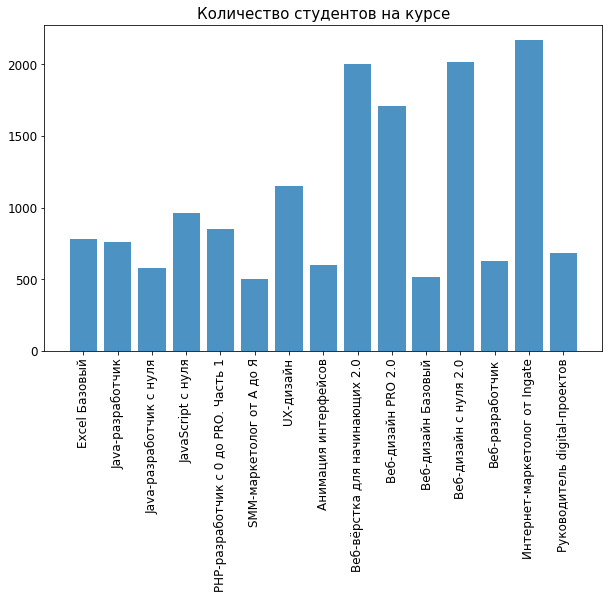

In [17]:
# Нарисуем график
plt.figure(figsize=(10, 6))
plt.bar(course_student_counter.index, course_student_counter.values, alpha=0.8)
plt.title("Количество студентов на курсе", fontsize=15)
plt.tick_params(labelsize=12)
plt.xticks(rotation='vertical')
plt.ylabel(None)
plt.show()

3. Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно

In [18]:
# Сформируем массив в котором будет 3 столбца: "field", "title" и число студентов на курсе. 
# Переименуем столбцы для более корректного отображения 
df_num_stud_grouped = df_full_descr_of_courses.groupby(['field', 'title'])['student_id']\
    .nunique()\
    .sort_values(ascending=True)\
    .reset_index()\
    .rename(columns={'title':'course_title', 'student_id':'amount_of_students'}) # переименуем столбцы

In [19]:
# Добавим в датафрейм столбец с цветами (нужен для отображения на графике)
def color_func(x):
    if x == 'Design':
        return 'red'
    elif x == 'Marketing':
        return 'blue'
    elif x == 'Development':
        return 'yellow'
    elif x == 'Business':
        return 'green'
df_num_stud_grouped['field_color'] = df_num_stud_grouped['field'].apply(color_func)
df_num_stud_grouped.head()

,field,course_title,amount_of_students,field_color
0,Marketing,SMM-маркетолог от А до Я,506,blue
1,Design,Веб-дизайн Базовый,518,red
2,Development,Java-разработчик c нуля,581,yellow
3,Design,Анимация интерфейсов,598,red
4,Development,Веб-разработчик,628,yellow


In [20]:
# Определим медианное число студентов на курсе
df_num_stud_median = df_num_stud_grouped['amount_of_students'].median()

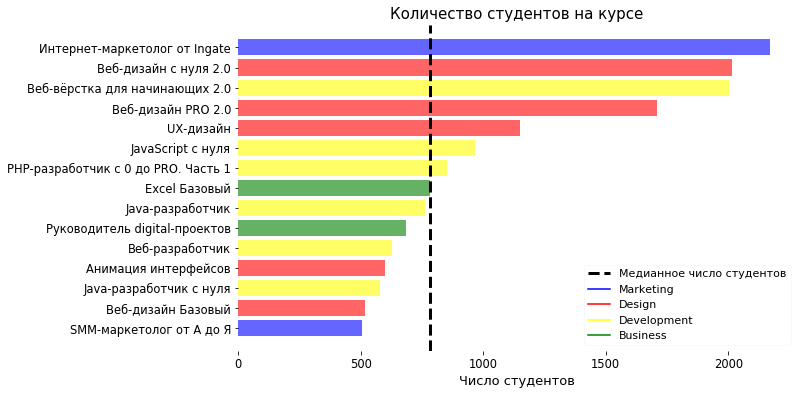

In [21]:
# Построим график 
plt.figure(figsize=(10, 6))
plt.barh(df_num_stud_grouped['course_title'], 
         width=df_num_stud_grouped['amount_of_students'], 
         color=df_num_stud_grouped['field_color'], 
         alpha=0.6)

# Нанесем медиану на график
plt.axvline(df_num_stud_median, ls='--', color='k', lw=3, alpha=1, label='Медианное число студентов')

# Сформируем легенду
labels = df_num_stud_grouped.drop_duplicates(subset='field')
for index, row in labels.iterrows():
    plt.plot([],[], color=row['field_color'], label=row['field'])
plt.legend(fontsize=11, title_fontsize=12, markerscale=5, framealpha=0.1)

# Подпишем график
plt.title("Количество студентов на курсе", fontsize=15)

# Подпишем ось х
plt.xlabel('Число студентов', size=13)

# Установим размер текста на тиках
plt.tick_params(labelsize=11.5)

# Удалим рамку на графике
plt.box(on=None)

# Выведем график
plt.show()

По предварительным результатам можно сделать выводы:
* В представленной выборке присутствуют данные о 15 курсах. Наиболее популярные курсы: **Интернет-маркетолог от Ingate** (2168 чел.), **Веб-дизайн с нуля 2.0** (2014 чел.), **Веб-вёрстка для начинающих 2.0** (2004 чел.). Наименее популярны курсы: **SMM-маркетолог от А до Я** (506 чел.), **Веб-дизайн Базовый** (518 чел.), **Java-разработчик c нуля** (581).
* На курсы записываются преимущественно люди в возрасте **25-30 лет**, но встречаются люди не достигшие 18 лет и предпенсионного возраста.
* Заметим, наиболее популярный курс **Интернет-маркетолог от Ingate** и наименее **SMM-маркетолог от А до Я** из одной области. Вероятно курс **Интернет-маркетолог от Ingate** более актуальный и отнимает аудиторию у курса **SMM-маркетолог от А до Я**.
* Похожие выводы можем сделать о курсах **Веб-дизайн с нуля 2.0** и **Веб-дизайн Базовый**.
* Также видно, что курсы, касающиеся **Java**, не пользуются популярностью. Вероятно это связано со сложностью языка, с падением спроса или другими факторами.

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

1. Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.

In [22]:
# Заберем нужные столбцы из исходного датафрема
df_start_date_initial = df_full_descr_of_courses[['title', 'start_date', 'student_id', 'is_homework']]
# Отфильтруем данные. Если статус не done, строку убрать из выборки, если домашней работы нет, убрать из выборки
df_start_date_initial = df_start_date_initial[df_start_date_initial['is_homework'] == True]
# Преобразуем даты в удобный для визуального восприятия формат
df_start_date_initial['start_date'] = df_start_date_initial['start_date'].apply(lambda x: x.date())
# Отсортируем данные
df_start_date_initial = df_start_date_initial.sort_values(['title', 'start_date'])
# Удалим строки так, чтобы остались только первые дз
df_start_date_initial = df_start_date_initial.drop_duplicates(subset = ['title', 'student_id'])
df_start_date_initial

,title,start_date,student_id,is_homework
48211,Excel Базовый,2018-02-19,c7d9f03162dab0e04e28067dafddb050,True
123909,Excel Базовый,2018-02-19,31e7a1e3da97d993581bb416e553c216,True
187561,Excel Базовый,2018-02-19,0d26ca1f35d89ee06970eadd007c9eab,True
328313,Excel Базовый,2018-02-19,d1121122c6378eeae3e8ab2b57a7fb5c,True
326902,Excel Базовый,2018-02-21,eda4e489680ba93c58b4e3f4f170d7a5,True
...,...,...,...,...
14022,Руководитель digital-проектов,2019-07-15,ab72117f608f8ea65495ad40ea4f683f,True
33667,Руководитель digital-проектов,2019-07-15,d20ad09af114eb05f6ff9cd86085fafa,True
233828,Руководитель digital-проектов,2019-07-15,0f200f8dad97c56865b53df8388985d9,True
71268,Руководитель digital-проектов,2019-07-16,e0ada954b5ca6664b697efc1cb73e869,True


In [23]:
# Создадим функцию для формирования списка с полным списком дат. 
def get_date_list(data):
    date = min(data)
    dates = []
    delta = DateOffset(months = 1)
    while date < max(data):
        dates.append(date)
        date = date + delta
        date = date.date()
    return dates

date_list = get_date_list(df_start_date_initial['start_date'])

In [24]:
# Создадим датафрейм, в котором будут храниться данные о названиях курсов и всех месяцах от 2016-03 до 2019-07 по порядку.

# Соберем названия курсов в список
group_keys = df_start_date_initial['title'].sort_values().unique()
# Создадим пустой датафрейм
df_start_date_for_month = pd.DataFrame(columns=['title', 'month', 'student_growth'])
index = 0
# Заполним его месяцами
for group in group_keys:
    for date in date_list:
        df_start_date_for_month.loc[index] = {'title': group, 'month': date, 'student_growth': 0}
        index += 1    
df_start_date_for_month.head()

,title,month,student_growth
0,Excel Базовый,2016-03-15,0
1,Excel Базовый,2016-04-15,0
2,Excel Базовый,2016-05-15,0
3,Excel Базовый,2016-06-15,0
4,Excel Базовый,2016-07-15,0


In [25]:
# Сгруппируем 2 имеющихся датафрейма по названиям курсов
df_start_date_initial_grouped = df_start_date_initial\
    .sort_values(['title', 'start_date'])\
    .groupby('title')
df_start_date_for_month_grouped = df_start_date_for_month.sort_values('title').groupby('title')

In [31]:
# В данном блоке осуществляется заполнение итогового датафрейма с приростом студентов.

# Объявим пустой датафрейм. Далее в него будем класть группы датафреймов после работы нижеприведенного алгоритмы 
df_new_student_counter = pd.DataFrame()
# Пройдемся циклом по каждому курсу в обоих датафреймах.
for group in group_keys:
    # Выбор конкретных текущих групп в двух датафреймах
    current_group_df1 = df_start_date_initial_grouped.get_group(group)
    current_group_df2 = df_start_date_for_month_grouped.get_group(group)
    # Цикл выявления месяцев, в котором студент послупил на курс
    for index_df1, row_df1 in current_group_df1.iterrows():
        start_date = row_df1['start_date']
        start_date_year = start_date.year
        start_date_month = start_date.month
        for index_df2, row_df2 in current_group_df2.iterrows():
            if (start_date_year == row_df2['month'].year) & (start_date_month == row_df2['month'].month):
                row_df2['student_growth'] += 1
    # Отсортируем полученный датафрейм
    current_group_df2 = current_group_df2.sort_values('month')
    # Датафрейм группы добавим в общий датафрейм
    df_new_student_counter = pd.concat([df_new_student_counter, current_group_df2], ignore_index=True)
# Скопируем итоговый датафрейм
df_new_student_counter_for_result = df_new_student_counter.copy()
# Сгруппируем итоговый датафрейм
df_new_student_counter = df_new_student_counter.groupby('title')             
    

In [32]:
df_new_student_counter_for_result['month']

0      2016-03-15
1      2016-04-15
2      2016-05-15
3      2016-06-15
4      2016-07-15
          ...    
610    2019-03-15
611    2019-04-15
612    2019-05-15
613    2019-06-15
614    2019-07-15
Name: month, Length: 615, dtype: object

In [33]:
# Преобразуем итоговый датафрейм для корректного вывода
data_func = lambda x: x.strftime('%Y-%m')
df_new_student_counter_for_result['month'] = df_new_student_counter_for_result['month'].apply(data_func)
df_new_student_counter_for_result = df_new_student_counter_for_result.groupby('title')
df_new_student_counter_for_result.get_group(group_keys[0])

,title,month,student_growth
0,Excel Базовый,2016-03,0
1,Excel Базовый,2016-04,0
2,Excel Базовый,2016-05,0
3,Excel Базовый,2016-06,0
4,Excel Базовый,2016-07,0
5,Excel Базовый,2016-08,0
6,Excel Базовый,2016-09,0
7,Excel Базовый,2016-10,0
8,Excel Базовый,2016-11,0
9,Excel Базовый,2016-12,0


2. На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.

In [34]:
# Функция для формирования ряда значений тиков. 
def get_nmonth_dates_for_ticks(data, period):
    date = min(data)
    dates = []
    delta = DateOffset(months = period)
    while date <= max(data):
        dates.append(date)
        date = date + delta
    dates = pd.to_datetime(dates)
    return dates

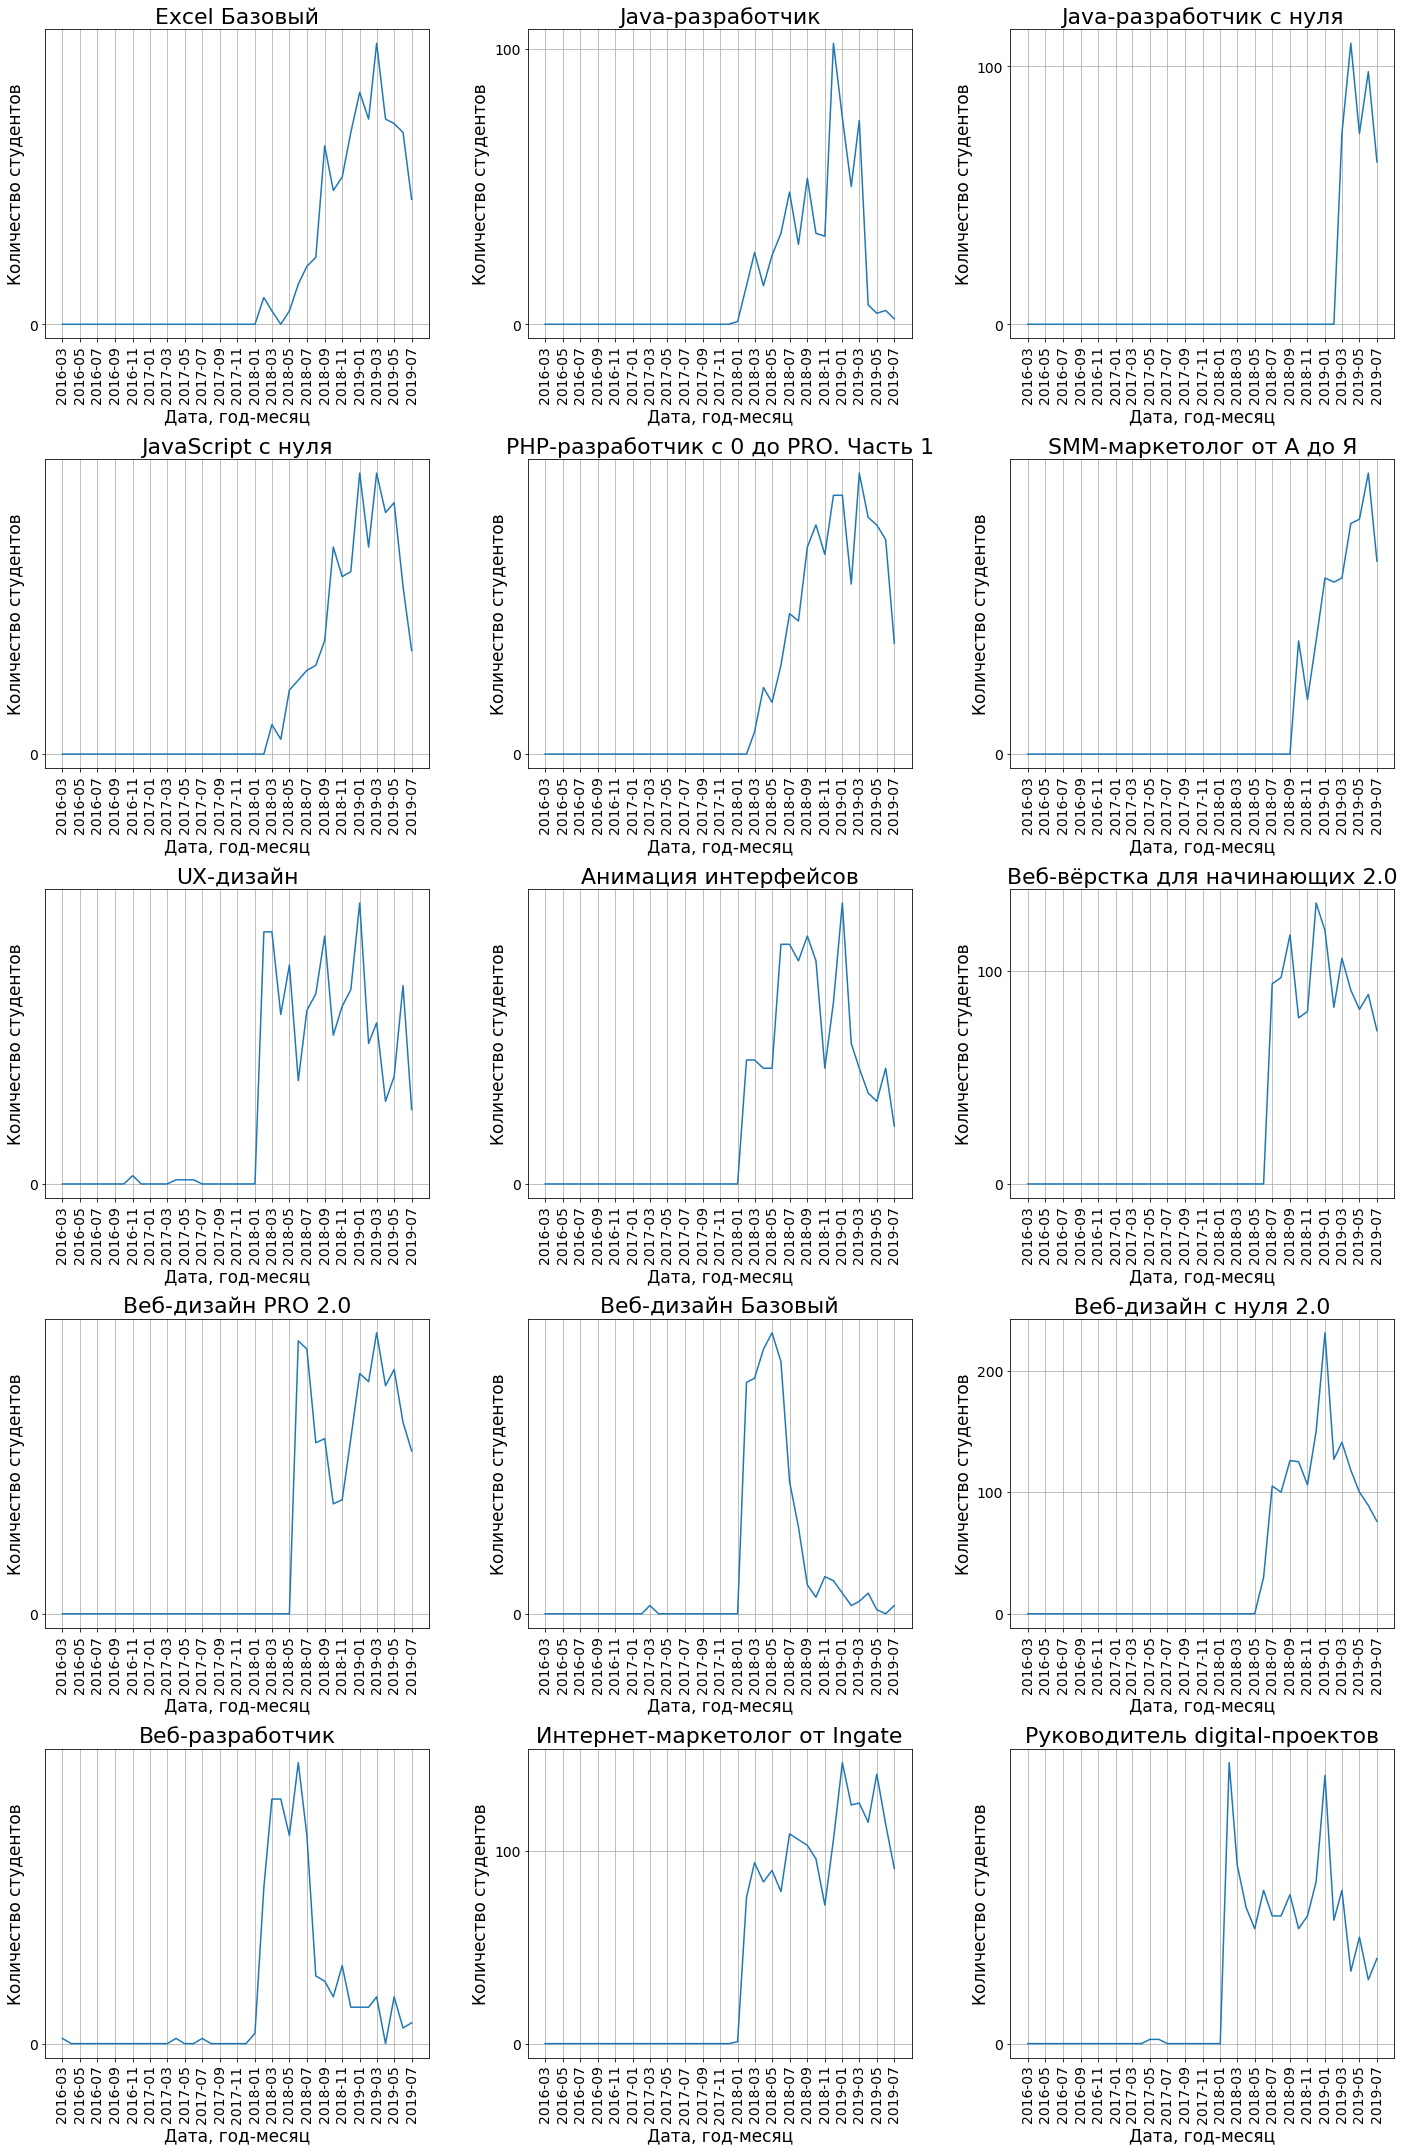

In [35]:
# Создание графика
f, ax = plt.subplots(5,3, figsize=(20,30))
for ax, course in zip(ax.ravel(), df_new_student_counter.groups.keys()):
    current_group = df_new_student_counter.get_group(course) # выбор текущей группы данных
    ax.set_title(course, fontsize=22)  
    ax.plot(current_group['month'], current_group['student_growth']) # Отрисовка графика
    ax.set_xlabel('Дата, год-месяц', fontsize=17) # Подпись оси x
    ax.set_ylabel('Количество студентов', fontsize=17) # Подпись оси y   
    # Формирование "х" тиков
    date_list = get_nmonth_dates_for_ticks(current_group['month'], 2)
    ax.set_xticks(date_list)
    ax.set_xticklabels([date.strftime('%Y-%m') for date in date_list], 
                       rotation='vertical', fontsize=14)
    # формирование "y" тиков    
    yticks = range(0, math.ceil(max(current_group['student_growth'])), 100)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks, fontsize=14)
    ax.grid()
plt.tight_layout() # разнесем графики для красивого отображение в фигуре
plt.show()

3. На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно.

In [36]:
# Создалим список уникальных цветов
colors_map = ['red', 'gold', 'darkgreen', 
              'darkcyan', 'slategray', 'navy', 
              'darkorchid', 'lightcoral', 'darkgoldenrod', 
              'c', 'deeppink', 'darkred', 
              'khaki', 'lightblue','indigo']

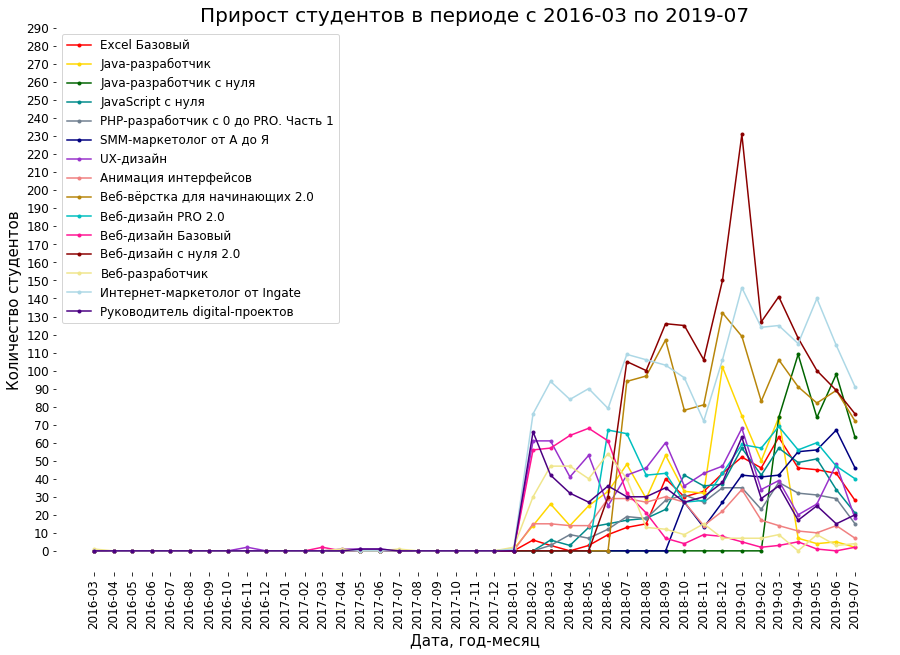

In [37]:
# Создание графика
f, ax = plt.subplots(figsize=(15,10))
color_index = 0
for group in group_keys:
    current_group = df_new_student_counter.get_group(group) # выбор текущей группы данных/
    # Отрисовка графика
    ax.plot(current_group['month'], 
            current_group['student_growth'], 
            label=group, 
            marker='.',
            color= colors_map[color_index]) 
    color_index += 1
# Формирование "х" тиков
date_list = get_nmonth_dates_for_ticks(current_group['month'], 1) # период в месяцах
ax.set_xticks(date_list)
ax.set_xticklabels([date.strftime('%Y-%m') for date in date_list], rotation='vertical', fontsize=14)                     
# Формирование "y" тиков   
yticks = range(0, 300, 10)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
# Оформление графика
ax.set_xlabel('Дата, год-месяц', fontsize=15) # Подпись оси "x"
ax.set_ylabel('Количество студентов', fontsize=15) # Подпись оси "y"  
plt.tick_params(axis='both', labelsize=12) # Установим размер шрифта подписей тиков
plt.title('Прирост студентов в периоде с 2016-03 по 2019-07', fontsize=20) # Назовем график
plt.legend(fontsize=12) # Вызовем легенду
plt.box(on=None) # Уберем рамки у фигуры
plt.show()

4. Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [38]:
# Заберем нужные столбцы из исходного датафрема
df_progress_counting_initial = df_full_descr_of_courses[['title','status', 'start_date',  
                                                         'finish_date', 'module_number', 
                                                         'lesson_number', 'is_homework']]
# Отфильтруем данные. Если статус не done, строку убрать из выборки, если домашней работы нет, убрать из выборки
df_progress_counting_initial = df_progress_counting_initial[(df_progress_counting_initial['status'] == 'done') & 
                                                           (df_progress_counting_initial['is_homework'] == True)]
# Преобразуем даты в удобный для визуального восприятия формат
df_progress_counting_initial['start_date'] = df_progress_counting_initial['start_date'].apply(lambda x: x.date())
df_progress_counting_initial['finish_date'] = df_progress_counting_initial['finish_date'].apply(lambda x: x.date())
# Отсортируем данные
df_progress_counting_initial = df_progress_counting_initial.sort_values(['title', 'start_date', 
                                                                         'module_number', 'lesson_number'])
# Удалим ненужные столбцы
df_progress_counting_initial = df_progress_counting_initial.drop(['status', 'module_number', 'lesson_number'], axis=1)
df_progress_counting_initial

,title,start_date,finish_date,is_homework
48211,Excel Базовый,2018-02-19,2018-02-20,True
123921,Excel Базовый,2018-02-19,2018-02-20,True
187561,Excel Базовый,2018-02-19,2018-02-20,True
328336,Excel Базовый,2018-02-19,2018-02-20,True
48248,Excel Базовый,2018-02-19,2018-02-20,True
...,...,...,...,...
75915,Руководитель digital-проектов,2019-07-12,2019-07-16,True
73232,Руководитель digital-проектов,2019-07-12,2019-07-16,True
99002,Руководитель digital-проектов,2019-07-13,2019-07-17,True
337942,Руководитель digital-проектов,2019-07-14,2019-07-17,True


In [39]:
# Создадим функцию для вычисления количества месяцев, в которые выполнялась домашняя работа
def months_counter(data):
    months_delta = (data['finish_date'].year - 
                    data['start_date'].year) * 12 + data['finish_date'].month - data['start_date'].month + 1
    return months_delta
# Создадим столбец и вычислим количество месяцев, в которые выполнялась домашняя работа
df_progress_counting_initial['month_counter'] = df_progress_counting_initial.apply(months_counter, axis=1)
df_progress_counting_initial

,title,start_date,finish_date,is_homework,month_counter
48211,Excel Базовый,2018-02-19,2018-02-20,True,1
123921,Excel Базовый,2018-02-19,2018-02-20,True,1
187561,Excel Базовый,2018-02-19,2018-02-20,True,1
328336,Excel Базовый,2018-02-19,2018-02-20,True,1
48248,Excel Базовый,2018-02-19,2018-02-20,True,1
...,...,...,...,...,...
75915,Руководитель digital-проектов,2019-07-12,2019-07-16,True,1
73232,Руководитель digital-проектов,2019-07-12,2019-07-16,True,1
99002,Руководитель digital-проектов,2019-07-13,2019-07-17,True,1
337942,Руководитель digital-проектов,2019-07-14,2019-07-17,True,1


In [40]:
# Отбъявим список дат
date_list = get_date_list(df_progress_counting_initial['start_date'])

In [41]:
# Создадим датафрейм, в котором будут храниться данные о названиях курсов и всех месяцах от 2016-03 до 2019-07 по порядку.

# Соберем названия курсов в список
group_keys = df_progress_counting_initial['title'].sort_values().unique()
# Создадим пустой датафрейм
df_progress_counting_for_month = pd.DataFrame(columns=['title', 'month', 'progress_counter'])
index = 0
# Заполним его месяцами
for group in group_keys:
    for date in date_list:
        df_progress_counting_for_month.loc[index] = {'title': group, 'month': date, 'progress_counter': 0}
        index += 1    
df_progress_counting_for_month.head()

,title,month,progress_counter
0,Excel Базовый,2016-03-15,0
1,Excel Базовый,2016-04-15,0
2,Excel Базовый,2016-05-15,0
3,Excel Базовый,2016-06-15,0
4,Excel Базовый,2016-07-15,0


In [42]:
# Сгруппируем 2 имеющихся датафрейма по названиям курсов
df_progress_counting_initial_grouped = df_progress_counting_initial\
    .sort_values(['title', 'start_date'])\
    .groupby('title')
df_progress_counting_for_month_grouped = df_progress_counting_for_month.sort_values('title').groupby('title')

In [43]:
# В данном блоке осуществляется заполнение итогового датафрейма с процессами.

# Объявим пустой датафрейм. Далее в него будем класть группы датафреймов после работы нижеприведенного алгоритмы 
df_progress_counting = pd.DataFrame()
# Пройдемся циклом по каждому курсу в обоих датафреймах.
for group in group_keys:
    # Выбор конкретных текущих групп в двух датафреймах
    current_group_df1 = df_progress_counting_initial_grouped.get_group(group)
    current_group_df2 = df_progress_counting_for_month_grouped.get_group(group)
    # Цикл вычисления месяцев в котором был прогресс.
    for index_df1, row_df1 in current_group_df1.iterrows():
        start_date = row_df1['start_date']
        start_date_year = start_date.year
        start_date_month = start_date.month
        # Если прогресс был только в одном месяце, выполни следующее:
        if row_df1['month_counter'] == 1:
            for index_df2, row_df2 in current_group_df2.iterrows():
                if (start_date_year == row_df2['month'].year) & (start_date_month == row_df2['month'].month):
                    row_df2['progress_counter'] += 1
        # Иначе:
        else:
            delta = row_df1['month_counter']
            # Циклом пройдемся по строке пока число месяцев в котором происходил прогресс не станет равен нулю.
            # На каждом шаге вычитается 1 из дельта и месяц смещается вперед
            while delta != 0:
                for index_df2, row_df2 in current_group_df2.iterrows():
                    if (start_date_year == row_df2['month'].year) & (start_date_month == row_df2['month'].month):
                        row_df2['progress_counter'] += 1
                if start_date_month == 12:
                    start_date_year +=1
                    start_date_month = 1
                else:
                    start_date_month +=1
                delta -= 1
    # Отсортируем полученный датафрейм
    current_group_df2 = current_group_df2.sort_values('month')
    # Датафрейм группы добавим в общий датафрейм
    df_progress_counting = pd.concat([df_progress_counting, current_group_df2], ignore_index=True)
# Скопируем итоговый датафрейм
df_progress_counting_for_result = df_progress_counting.copy()
# Сгруппируем итоговый датафрейм
df_progress_counting = df_progress_counting.groupby('title')             
    

In [44]:
# Преобразуем итоговый датафрейм для корректного вывода
data_func = lambda x: x.strftime('%Y-%m')
df_progress_counting_for_result['month'] = df_progress_counting_for_result['month'].apply(data_func)
df_progress_counting_for_result = df_progress_counting_for_result.groupby('title')
df_progress_counting_for_result.get_group(group_keys[0])

,title,month,progress_counter
0,Excel Базовый,2016-03,0
1,Excel Базовый,2016-04,0
2,Excel Базовый,2016-05,0
3,Excel Базовый,2016-06,0
4,Excel Базовый,2016-07,0
5,Excel Базовый,2016-08,0
6,Excel Базовый,2016-09,0
7,Excel Базовый,2016-10,0
8,Excel Базовый,2016-11,0
9,Excel Базовый,2016-12,0


5. Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы

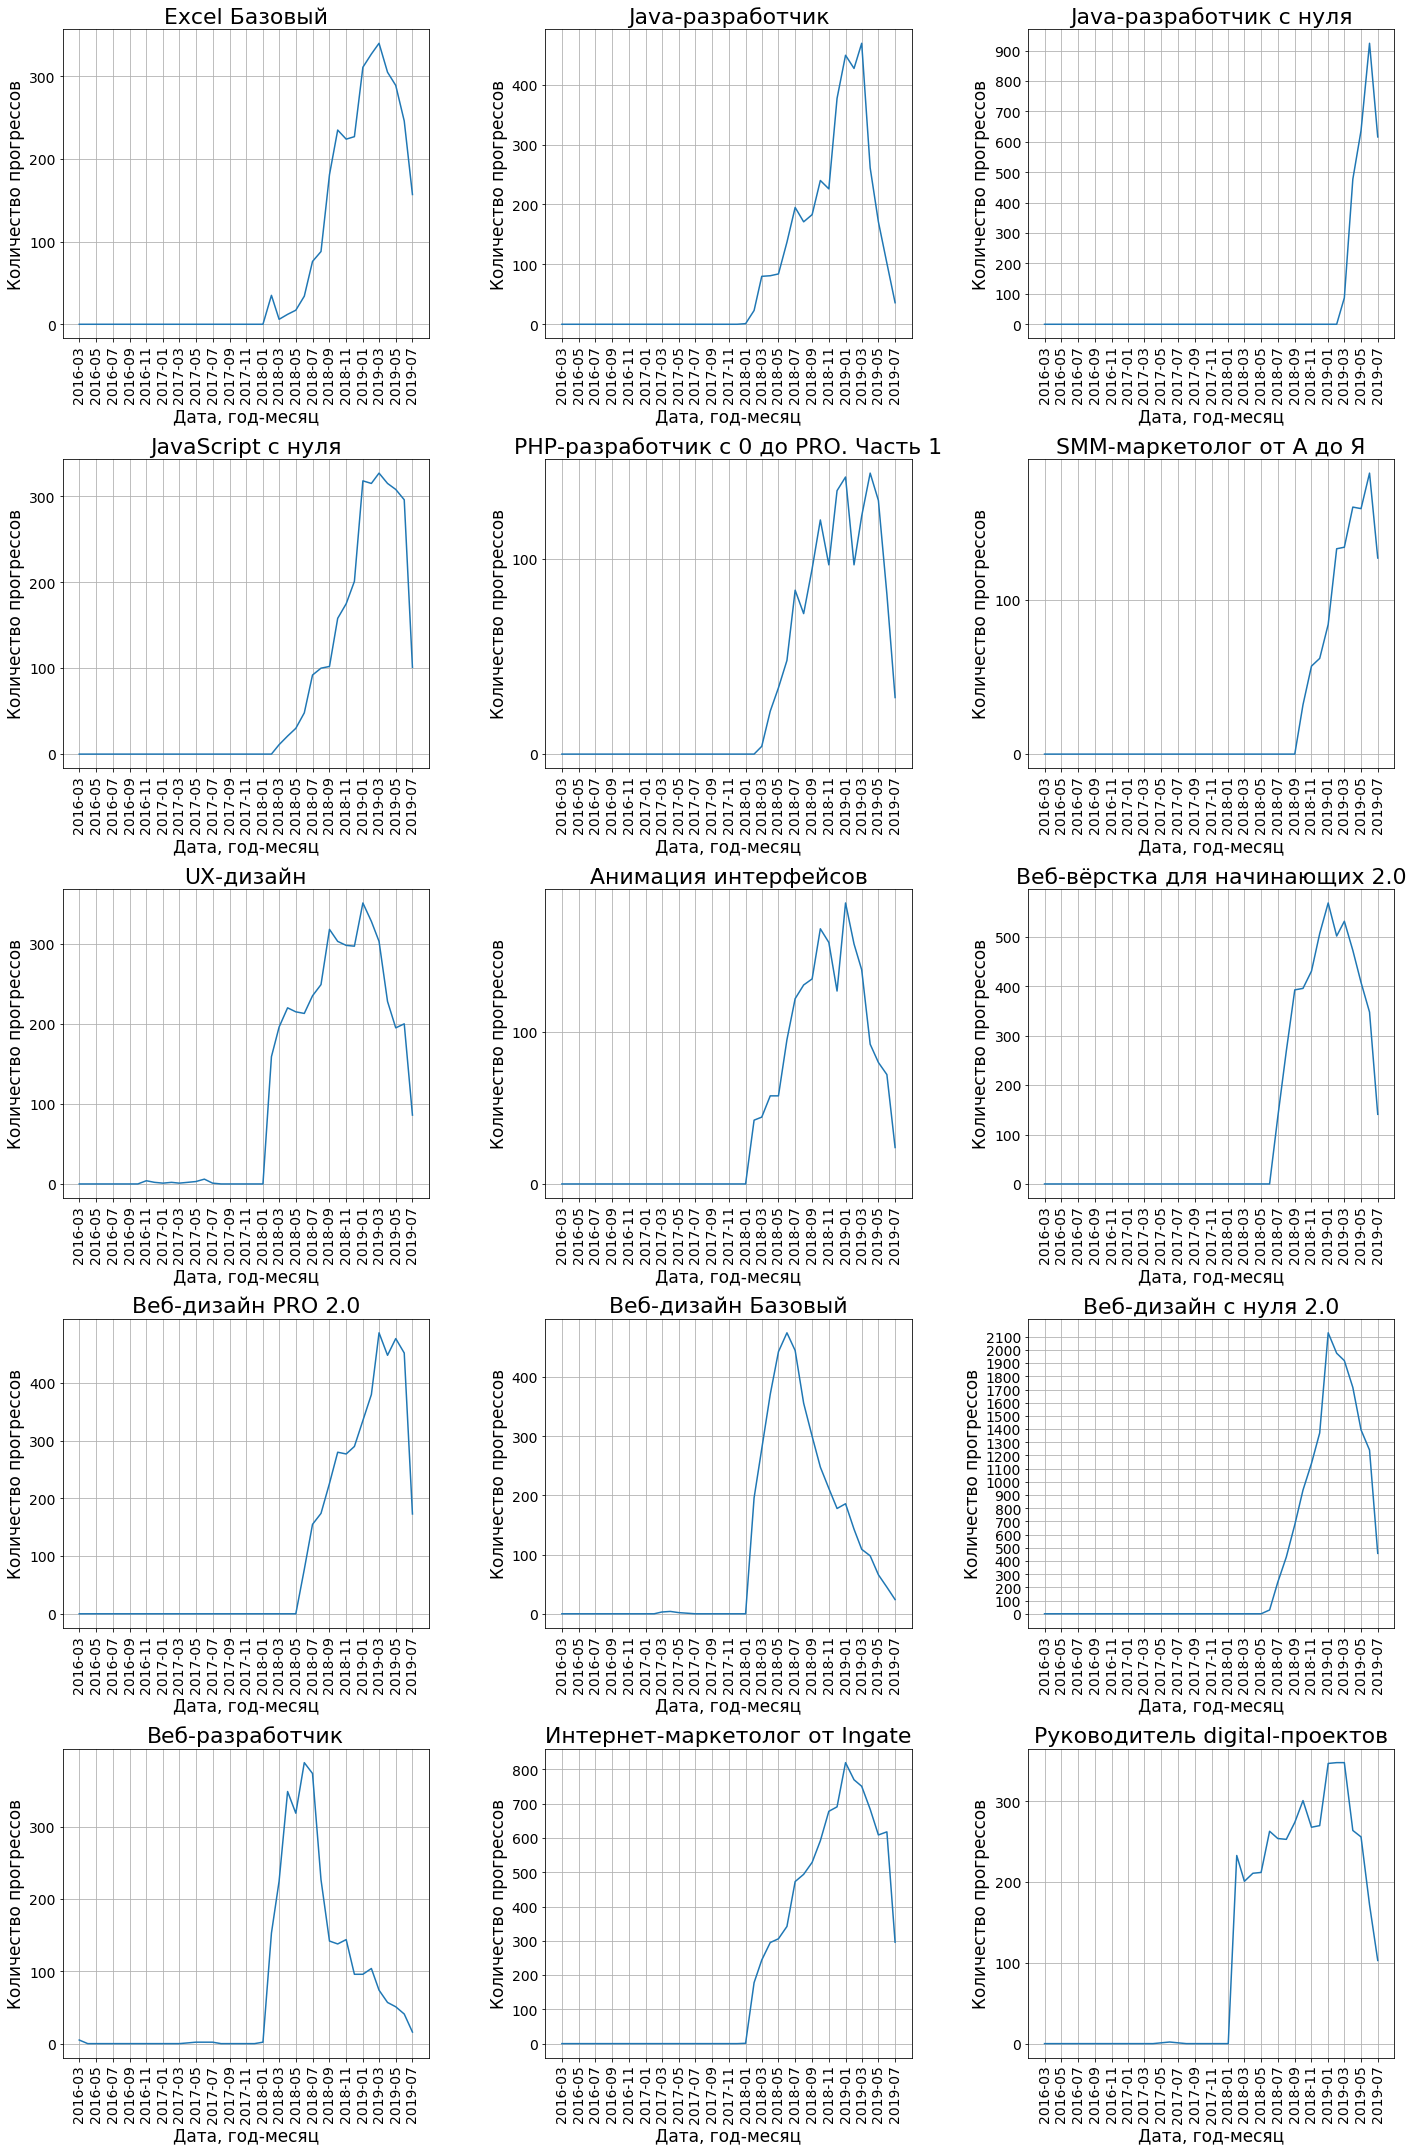

In [45]:
# Создание графика
f, ax = plt.subplots(5,3, figsize=(20,30))
for ax, course in zip(ax.ravel(), df_progress_counting.groups.keys()):
    current_group = df_progress_counting.get_group(course) # выбор текущей группы данных
    ax.set_title(course, fontsize=22)  
    ax.plot(pd.to_datetime(current_group['month']), current_group['progress_counter']) # Отрисовка графика
    ax.set_xlabel('Дата, год-месяц', fontsize=17) # Подпись оси x
    ax.set_ylabel('Количество прогрессов', fontsize=17) # Подпись оси y   
    # Формирование "х" тиков
    date_list = get_nmonth_dates_for_ticks(current_group['month'], 2)
    ax.set_xticks(date_list)
    ax.set_xticklabels([date.strftime('%Y-%m') for date in date_list], 
                       rotation='vertical', fontsize=14)
    # формирование "y" тиков    
    yticks = range(0, math.ceil(max(current_group['progress_counter'])), 100)
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks, fontsize=14)
    ax.grid()
plt.tight_layout() # разнесем графики для красивого отображение в фигуре
plt.show()

6. Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно.

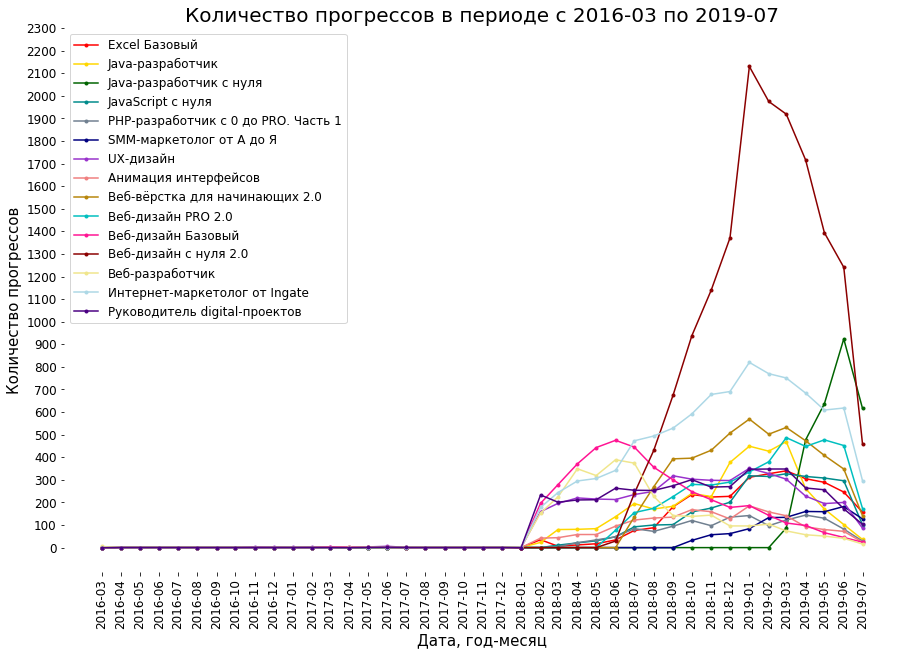

In [46]:
# Создание графика
f, ax = plt.subplots(figsize=(15,10))
color_index = 0 # индекс в списке цветов, сам список смотреть в п. 2.3
for group in group_keys:
    current_group = df_progress_counting.get_group(group) # выбор текущей группы данных
    # Отрисовка графика
    ax.plot(pd.to_datetime(current_group['month']), 
            current_group['progress_counter'], 
            label=group, 
            marker='.',
            color= colors_map[color_index]) 
    color_index += 1

# Формирование "х" тиков
date_list = get_nmonth_dates_for_ticks(current_group['month'], 1) # период в месяцах
ax.set_xticks(date_list)
ax.set_xticklabels([date.date().strftime('%Y-%m') for date in date_list], rotation='vertical')
                     
# Формирование "y" тиков    
yticks = range(0, 2400, 100)
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)

# Оформление графика
ax.set_xlabel('Дата, год-месяц', fontsize=15) # Подпись оси "x"
ax.set_ylabel('Количество прогрессов', fontsize=15) # Подпись оси "y" 
plt.tick_params(axis='both', labelsize=12) # Установим размер шрифта подписей тиков
plt.title('Количество прогрессов в периоде с 2016-03 по 2019-07', fontsize=20) # Назовем график
plt.legend(fontsize=12) # Вызовем легенду
plt.box(on=None) # Уберем рамки у фигуры
plt.show()

На основании вышеприведенных графиков можно сделать следующие выводы:
* В **январе-феврале 2018 года** произошло что-то, что привело к **резкому увеличению** числа пользователей сервиса skillbox. Это мог быть официальный запуск сервиса, эффективная рекламная компания и др.
* Видим, что курсы из области **Дизайн** отбирают друг у друга аудиторию. Сначала был запущен курс "Веб-дизайн Базовый" с пиком популярности в **мае 2018 года**; в мае 2018 года были запущены курсы "Веб-дизайн PRO 2.0" и "Веб-дизайн с нуля 2.0", они разом начали набирать популярность, при этом показатели прироста студентов на курсе "Веб-дизайн Базовый" упали и продолжали падать до июля 2019 года.
* Начало резкого спада количества прогрессов в курсе "Веб-дизайн Базовый" совпадает с запуском и началом роста количества прогрессов на курсах "Веб-дизайн PRO 2.0" и "Веб-дизайн с нуля 2.0", что подтверждает выше сказанное.
* В **начале 2019** года был запущен курс "Java разработчик с нуля", который, очевидно, отобрал аудиторию у похожего курса  "Java разработчик". Но стоит отметить, что перед запуском курса "Java разработчик с нуля" у курса "Java разработчик" было снижение прироста пользователей в течение 2-х месяцев.
* Наибольший прирост студентов на периоде с марта 2016 г. до июля 2019 г. зафиксирован у курса "Веб-дизайн с нуля 2.0" в **январе 2019 года**.
* Видим, что на курсах "Java разработчик с нуля", "SMM-маркетолог от А до Я" продолжается увеличение прироста новых пользователей, что говорит о интересе к данным продуктам.
* С запуском каждого курса наблюдается продолжительный рост количества прогрессов по курсам. В **конце 2018 - начале 2019 года** наблюдается спад активности по всем курсам. Стоит заметить, что в курсах "Java разработчик с нуля", "SMM-маркетолог от А до Я", "JavaScript с нуля" спад начался в июне 2019 года. Вероятно это связано с сезоном отпусков, дач и т.п. 


## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

### Примечание для проверяющего:
В конце выполнения данной главы выяснилось, что в результате фильтрации данных из выборки пропадают данные по некоторым модулям. Сложно судить имеют ли они домашние задания, или все студенты пропустили данные модули, это требует дополнительного анализа, не предусмотренного данной главой.

1. Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

In [47]:
# Скопируем исходный датафрейм
df_3_courses_initial = df_full_descr_of_courses.copy()
# Удалим ненужные столбцы
df_3_courses_initial = df_3_courses_initial.drop(['progress_id', 'course_id', 
                                                  'lesson_title', 'lesson_token', 'is_video', 'field'], axis=1)
# Отфильтруем данные по 3 критериям: дз есть в наличии, статус - сделано, дата окончания работы позже даты начала
df_3_courses_initial = df_3_courses_initial[(df_3_courses_initial['is_homework'] == True) & 
                                            (df_3_courses_initial['status'] == 'done') &
                                            (df_3_courses_initial['start_date'] < df_3_courses_initial['finish_date'])]
# Отсортируем
df_3_courses_initial = df_3_courses_initial.sort_values(['title', 'module_title', 'start_date'])
# Удалим ненужные столбцы и переопределим индексацию
df_3_courses_initial = df_3_courses_initial.drop(['status', 'is_homework'], axis=1).reset_index(drop=True)
# Переставим столбцы
df_3_courses_initial = df_3_courses_initial[['title', 'module_title', 'module_number' , 'start_date', 
                                             'finish_date', 'student_id', 'lesson_number']]
df_3_courses_initial

,title,module_title,module_number,start_date,finish_date,student_id,lesson_number
0,Excel Базовый,Визуализация данных Excel,7,2018-02-20 11:51:56.046325+00:00,2018-02-24 11:41:45.898806+00:00,c7d9f03162dab0e04e28067dafddb050,5
1,Excel Базовый,Визуализация данных Excel,7,2018-04-02 19:38:08.607561+00:00,2018-04-05 21:52:16.013473+00:00,31e7a1e3da97d993581bb416e553c216,5
2,Excel Базовый,Визуализация данных Excel,7,2018-04-16 11:34:36.908444+00:00,2018-04-24 11:22:55.591327+00:00,76aaaabc337e12dc06ffa43bdefe1036,5
3,Excel Базовый,Визуализация данных Excel,7,2018-05-25 11:25:07.904245+00:00,2018-05-29 09:18:54.013301+00:00,e2b2f087d8c51430f9a975422bab010f,5
4,Excel Базовый,Визуализация данных Excel,7,2018-06-24 16:54:48.706416+00:00,2018-07-05 13:28:21.131740+00:00,8397e5ccffc74217c31359c99dc081b4,5
...,...,...,...,...,...,...,...
44081,Руководитель digital-проектов,Экологичный путь менеджера,1,2019-07-10 04:11:54.202637+00:00,2019-07-10 08:45:23.323825+00:00,024579bafbda3f8cfa9e10c23005413b,4
44082,Руководитель digital-проектов,Экологичный путь менеджера,1,2019-07-12 09:28:46.805851+00:00,2019-07-17 03:25:35.162853+00:00,2630361f8fe4b2045820e214a6c5fc71,4
44083,Руководитель digital-проектов,Экологичный путь менеджера,1,2019-07-13 12:21:17.719959+00:00,2019-07-17 03:31:34.850833+00:00,11c2e004db852bc92b22faa8b0b21867,4
44084,Руководитель digital-проектов,Экологичный путь менеджера,1,2019-07-14 18:14:24.870333+00:00,2019-07-17 03:55:00.141281+00:00,49d73600902af5127f738c9b94b18d5f,4


In [48]:
# Сгруппируем датафрейм
df_3_courses_initial_grouped = df_3_courses_initial.groupby(['title', 'module_title', 'module_number', 'student_id'])
# Сформируем список ключей группы
group_keys = list(df_3_courses_initial_grouped.groups.keys())

In [49]:
# Создадим пустой датафрейм, вычислим время выполнения дз 
# и добавим результат в этот датафрейм вместе с другими нужными столбцами
df_3_courses = pd.DataFrame()
for group in group_keys:
    current_group = df_3_courses_initial_grouped.get_group(group)
    start_date = min(current_group['start_date'])
    finish_date = max(current_group['finish_date'])
    timedelta = finish_date - start_date
    df_in_this_loop = pd.DataFrame({'title': [group[0]], 
                                    'module_title': [group[1]],
                                    'module_number': [group[2]],
                                    'timedelta': [timedelta]})
    # Датафрейм данного цикла добавим в общий датафрейм
    df_3_courses = pd.concat([df_3_courses, df_in_this_loop], ignore_index=True)
    

In [50]:
df_3_courses_final = df_3_courses
# Преобразуем данные в столбце timedelta в вид удобный для произведения числовых операций
df_3_courses_final['timedelta_int64'] = df_3_courses_final['timedelta'].values.astype(np.int64)
# Сгруппируем и вычислим минимальное, максимальное, среднее и мединное значение
df_3_courses_final = df_3_courses_final\
    .groupby(['title', 'module_title', 'module_number'])['timedelta_int64']\
    .agg(min_val='min', max_val='max', mean_val='mean', median_val='median')\
    .reset_index()
# Преобразуем данные результаты вычисления в удобный для восприятия вид
df_3_courses_final['min_val'] = pd.to_timedelta(df_3_courses_final['min_val'])
df_3_courses_final['max_val'] = pd.to_timedelta(df_3_courses_final['max_val'])
df_3_courses_final['mean_val'] = pd.to_timedelta(df_3_courses_final['mean_val'])
df_3_courses_final['median_val'] = pd.to_timedelta(df_3_courses_final['median_val'])
# Отсортируем датафрейм по номеру модуля, чтобы расположить в правильном порядке и сгруппируем по названию курса
df_3_courses_final = df_3_courses_final.sort_values('module_number').groupby('title')
# Сформируем список из названий курсов и выведем 1 на экран
group_keys = list(df_3_courses_final.groups.keys())
df_3_courses_final.get_group(group_keys[0])

,title,module_title,module_number,min_val,max_val,mean_val,median_val
1,Excel Базовый,Основной функционал Excel,1,00:52:49.101080,183 days 17:57:52.247793,6 days 01:03:55.201511,2 days 07:56:55.715077
2,Excel Базовый,Основной функционал Excel (продолжение),2,00:53:46.720239,184 days 06:27:48.841839,4 days 08:22:23.940379,1 days 20:57:26.256583
5,Excel Базовый,Формулы и функции Excel. Введение,3,00:28:21.958252,89 days 03:11:50.758958,3 days 10:46:33.700404,1 days 12:14:41.442344
6,Excel Базовый,Формулы и функции Excel. Продолжаем работать с...,4,01:45:43.006464,327 days 13:09:58.465046,11 days 00:52:27.254254,3 days 06:06:38.675476
4,Excel Базовый,Формулы и функции Excel. Более сложные формулы,5,01:22:41.490445,175 days 13:10:49.724595,7 days 10:54:43.013561,3 days 02:03:42.691376
7,Excel Базовый,"Формулы и функции Excel. Работа с ошибками, пр...",6,01:03:09.315027,77 days 14:11:10.671594,5 days 04:03:35.213347,2 days 10:22:07.927741
0,Excel Базовый,Визуализация данных Excel,7,03:08:28.416579,174 days 20:08:51.808309,10 days 04:19:10.343811,4 days 22:07:19.121667
3,Excel Базовый,Сводные таблицы Excel,8,03:03:51.039587,239 days 05:25:57.105366,9 days 17:52:25.850796,2 days 23:50:15.197141
8,Excel Базовый,Экзаменационная работа,9,16:26:41.207438,156 days 03:11:10.148751,18 days 14:31:31.775634,10 days 04:44:47.225865


2. На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки

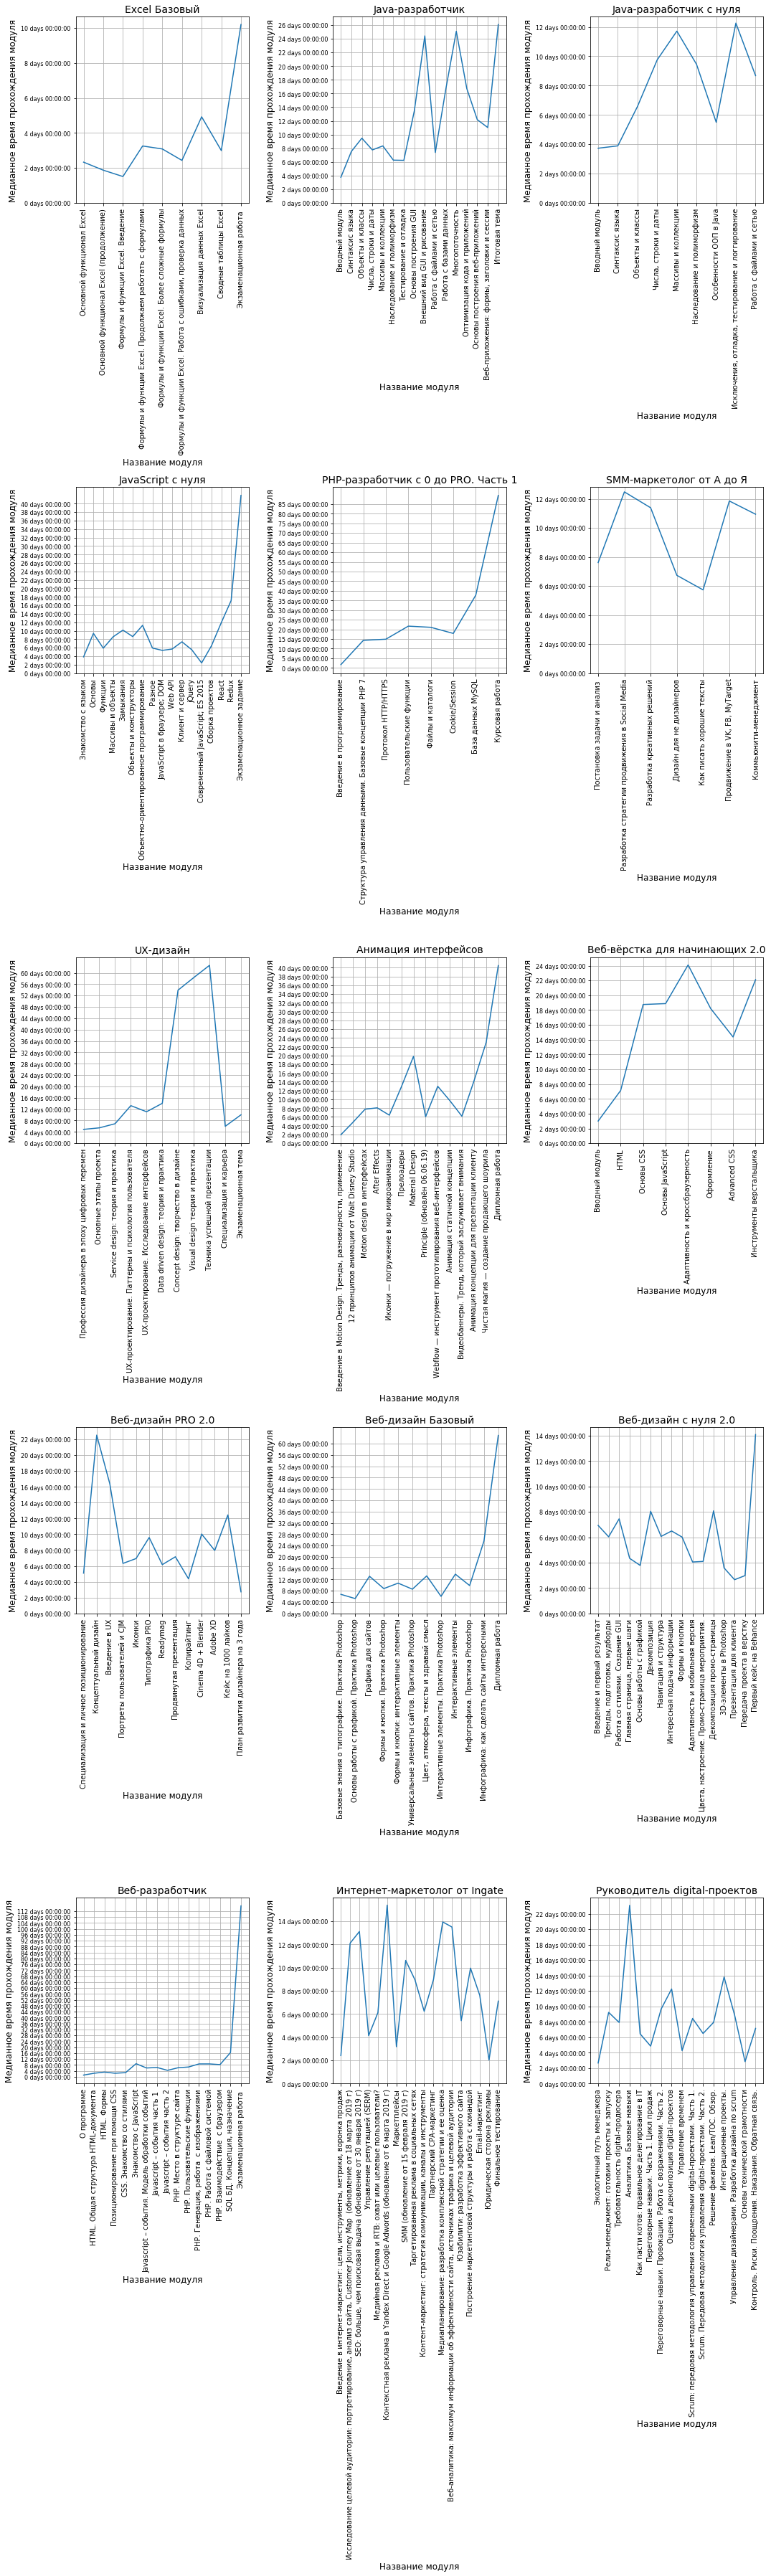

In [51]:
# Создание графика
f, ax = plt.subplots(5, 3, figsize=(15,50))
for ax, course in zip(ax.ravel(), df_3_courses_final.groups.keys()):
    current_group = df_3_courses_final.get_group(course) # выбор текущей группы данных
    ax.set_title(course, fontsize=14)  
    ax.plot(current_group['module_title'], current_group['median_val']) # Отрисовка графика
    ax.set_xlabel('Название модуля', fontsize=12) # Подпись оси "x"
    ax.set_ylabel('Медианное время прохождения модуля', fontsize=12) # Подпись оси "y"   
    # Формирование "х" тиков
    ax.set_xticks(current_group['module_title'])
    ax.set_xticklabels(current_group['module_title'], rotation='vertical', fontsize=10)                     
    ax.grid()
    # Формирование "y" тиков
    # Нижеприведенный код предназначен для формирования шага в тиках (более красивое оформление)
    n_tick_days = int((pd.Timedelta.ceil(max(current_group['median_val']), 'D')) / np.timedelta64(1, 'D'))
    if (n_tick_days % 2 != 0):
        n_tick_days += 1
    if (n_tick_days >= 30) & (n_tick_days % 5 == 0):
        k = 5
    elif (n_tick_days >= 30) & (n_tick_days % 4 == 0):
        k = 4
    elif (n_tick_days >= 30) & (n_tick_days % 2 == 0):
        k = 2
    elif (10 < n_tick_days < 30) & (n_tick_days % 2 == 0):
        k = 2
    yticks = pd.to_timedelta(range(0, n_tick_days, k), 'D')
    ax.set_yticks(yticks.values.astype(np.int64))
    ax.set_yticklabels(yticks, fontsize=8)

plt.tight_layout() # разнесем графики для красивого отображение в фигуре
plt.show()

3. Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 

In [52]:
# Создадим пустой датафрейм, вычислим время выполнения дз 
# и добавим результат в этот датафрейм вместе с другими нужными столбцами
group_keys = list(df_3_courses_initial_grouped.groups.keys())
df_3_courses_for_season = pd.DataFrame()
for group in group_keys:
    current_group = df_3_courses_initial_grouped.get_group(group)
    start_date = min(current_group['start_date'])
    finish_date = max(current_group['finish_date'])
    timedelta = finish_date - start_date
    df_in_this_loop = pd.DataFrame({'title': [group[0]], 
                                    'finish_date': [finish_date],
                                    'timedelta': [timedelta]})
    # Датафрейм текущего цикла добавим в общий датафрейм
    df_3_courses_for_season = pd.concat([df_3_courses_for_season, df_in_this_loop], ignore_index=True)
    

In [53]:
# В данной ячейке происходит работа с датафреймом сформированном в предыдущей ячейке
df_3_courses_for_season_final = df_3_courses_for_season.copy()
# Возьмем из даты месяц
df_3_courses_for_season_final['finish_date_month'] = df_3_courses_for_season_final['finish_date']\
    .apply(lambda x: x.month)
# Поменяем формат у данных в столбце timedelta
df_3_courses_for_season_final['timedelta_int64'] = df_3_courses_for_season_final['timedelta'].values.astype(np.int64)
# Отсортируем, сгруппируем и вычислим медианное значение timedelta в каждом месяце в каждом курсе
df_3_courses_for_season_final = df_3_courses_for_season_final\
    .sort_values('finish_date_month')\
    .groupby(['title', 'finish_date_month'])['timedelta_int64']\
    .agg(median_val='median')
# Поменяем формат у данных в столбце median_val для более красивого отображения
df_3_courses_for_season_final['median_val'] = pd.to_timedelta(df_3_courses_for_season_final['median_val'])
# Переопределим индекс
df_3_courses_for_season_final = df_3_courses_for_season_final.reset_index()
# Изменим вид у месяцев для более красивого отображения
df_3_courses_for_season_final['finish_date_month'] = df_3_courses_for_season_final['finish_date_month']\
    .apply(lambda x: datetime.datetime(2000, x, 1).strftime('%b'))
# Сгруппируем по названиям курсов
df_3_courses_for_season_final = df_3_courses_for_season_final.groupby('title')
# Сформируем список из названий курсов и выведем 1 на экран
group_keys = list(df_3_courses_for_season_final.groups.keys())
df_3_courses_for_season_final.get_group(group_keys[0])

,title,finish_date_month,median_val
0,Excel Базовый,Jan,2 days 02:23:19.408905
1,Excel Базовый,Feb,2 days 10:33:54.148883
2,Excel Базовый,Mar,2 days 19:52:58.386801
3,Excel Базовый,Apr,1 days 21:12:39.180702
4,Excel Базовый,May,2 days 13:55:33.682246
5,Excel Базовый,Jun,2 days 14:12:22.737567
6,Excel Базовый,Jul,2 days 06:34:10.167010
7,Excel Базовый,Aug,2 days 14:49:48.378198
8,Excel Базовый,Sep,2 days 07:12:31.976105
9,Excel Базовый,Oct,2 days 06:39:14.605444


4. На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно.

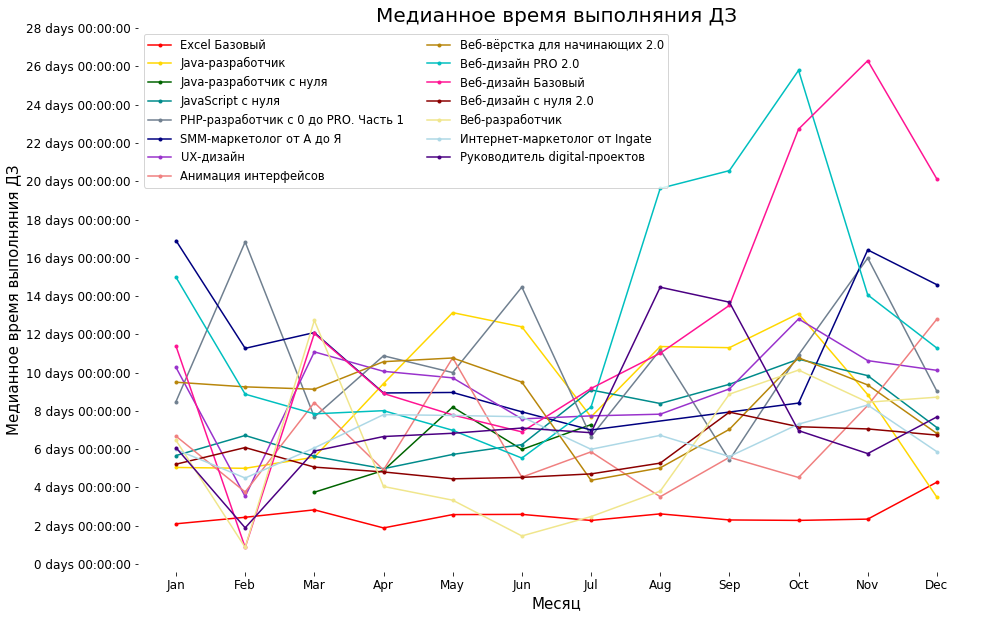

In [54]:
# Создание графика
f, ax = plt.subplots(figsize=(15,10))
color_index = 0 # индекс в списке цветов, сам список смотреть в п. 2.3
for course in group_keys:
    current_group = df_3_courses_for_season_final.get_group(course) # выбор текущей группы данных
    # Отрисовка графика
    ax.plot(current_group['finish_date_month'], 
            current_group['median_val'], 
            label=course, 
            marker='.',
            color= colors_map[color_index]) 
    color_index += 1

# формирование "х" тиков
xticks = current_group['finish_date_month']
ax.set_xticks(xticks)
ax.set_xticklabels(xticks)
                     
# Формирование "y" тиков    
n_tick_days = int((pd.Timedelta.ceil(max(current_group['median_val']), 'D')) / np.timedelta64(1, 'D'))
    
yticks = pd.to_timedelta(range(0, 30, 2), 'D')
ax.set_yticks(yticks.values.astype(np.int64))
ax.set_yticklabels(yticks)

# Оформление графика
ax.set_xlabel('Месяц', fontsize=15) # Подпись оси x
ax.set_ylabel('Медианное время выполняния ДЗ', fontsize=15) # Подпись оси y 
plt.tick_params(axis='both', labelsize=12) # Установим размер шрифта подписей тиков
plt.title('Медианное время выполняния ДЗ', fontsize=20) # Назовем график
plt.legend(ncol=2, fontsize=11.5) # Вызовем легенду
plt.box(on=None) # Уберем рамки у фигуры
plt.show()

По результатам, полученным в данной главе, можем сделать следующие выводы:
* **Excel Базовый**. Курс в целом достаточно простой, виден тренд к увеличению времени выполнения домашних заданий по модулю с продвижением по курсу. Вероятно это связано с усложнение домашних заданий от модуля к модулю. На экзаменационную работу тратят заметно больше времени (10 дней). В данных есть люди, которые проходят весь курс за сутки или наоборот, очень долго, нельзя сказать, что это выбросы, но следует иметь ввиду, что такие данные есть. В течение года задания выполняются стабильно, нет заметного роста/падения активности в каком-либо сезоне.
* **Java-разработчик**. Курс сложный, домашнюю работу по каждому модулю приходится выполнять несколько дней. Видно, что домашние задания по модулям "Внешний вид GUI и рисование", "Многопоточность" и "Итоговая тема" выполняюся гораздо дольше остальных. Это может быть связано со сложностью материала, объемом работы и т.п.. Чтобы понять, почему так происходит,  следует проанализировать другие данные по этим модулям. Видим, что в течение года задания решаются неравномерно, зимой (декабрь - март) задания выполняются быстрее (4-6 дней), в апреле - мае период выполнения растет (до 12 дней), в июле наблюдаем уменьшение периода выполнения, а затем рост до уровня весны (10-12 дней). Явно выражена сезонность.
* **Java-разработчик с нуля**. Время выполнения домашних заданий в данном курсе неравномерное, некоторые модули проходятся за 4 дня, другие 11-12 дней. Рассматривая данный курс, сложно говорить о сезонности, т.к. данный курс новый, и нет данных за весь год.
* **JavaScript с нуля**. Домашние задания по данному курсу выполняются неравномерно, время выполнения от модуля к модулю колеблется от 3 до 11 дней. Заметен рост длительности выполнения домашних заданий при освоении последних модулей и выполнении экзаменационного задания.
* **PHP-разработчик с 0 до PRO. Часть 1**. В целом домашние задания по модулям данном курсе выполняются равномерно. С каждым последующим модулем время выполнения домашнего задания растет. Особенно много времени люди тратят на выполнение курсовой работы.
* **SMM-маркетолог от А до Я**. В целом данный курс короткий, выполнение каждого задания занимает от 6 до 12 дней. Замечена сезонность: зимой время выполнения домашних заданий растет.
* **UX-дизайн**. В данном курсе присутствуют модули, которые требуют заметно больше времени. Возможно стоит Разбить данные модули на более мелкие или рассмотреть материал подробнее. По графику выполнения дз в течение года видно, что в целом сезонность в выполнении домашних работ по данному курсу отсутствует, но есть падение периода виполнения дз в феврале.
* **Анимация интерфейсов**. В данном курсе заметна неравномерность в выполнении домашних заданий. Модуль "Material Design" дается студентам дольше, чем другие. Особенные трудности возникают при выполнении дипломной работы. В течение года задания выполняются неравномерно, в некоторых месяцах период выполнения растет, внекоторых уменьшается, но говорить о сезонности нельзя.
* **Веб-вёрстка для начинающих 2.0**. В данном курсе первые модули заметно проще остальных. Заметим, что в периоде с июля по август время выполнения домашних заданий заметно меньше, чем в остальное время.
* **Веб-дизайн PRO 2.0**. В данном курсе проблемы у студентов вызывает модуль "Концептуальный дизайн". Замечена сезонность выполнения домашних заданий: с июля по декабрь время выполнения заметно растет.
* **Веб-дизайн Базовый**. Задания в данном курсе выполняются равномерно, с продвижение по курсу время выполнения домашних заданий растет, но без резких взлетов или падений. Особенно много времени требуется на выполнение дипломной работы. Замечена сезонность выполнения домашних заданий: в феврале время выполнения гораздо ниже, чем в течение остального года,  однако с июля по декабрь время выполнения заметно растет.
* **Веб-дизайн с нуля 2.0**. Скорость выполнения домашних заданий в данном курсе вполне постоянна, из общей картины выбивается модуль "Первый кейс в Behance". Сезонность не наблюдается.
* **Веб-разработчик**. Задания в данном курсе выполняются равномерно, с продвижение по курсу время выполнения домашних заданий растет, но без резких взлетов или падений. Особенно много времени требуется на выполнение экзаменационных работ. Замечена сезонность выполнения домашних заданий: в марте и сентябре-декабре время выполнения заметно растет.
* **Интернет-маркетолог от Ingate**. График выполнения домашних работ по модулям крайне неравномерный, вероятно скачет сложность дз от модуля к модулую. В течение года домашние задания выполняются равномерно за 6-8 дней.
* **Руководитель digital-проектов**. Есть проблема с выполнением модуля "Аналитика. Базовые навыки". В целом, в течение года задания выполняются стабильно, но заметно увеличение времени выполнения домашних работ с июля по октябрь.


## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

1. Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).

In [55]:
# Создадим исходный датафрейм для дальнейшей работы в данной главе
df_4_convers_initial = df_full_descr_of_courses[[
    'field', 'title', 'module_title', 'module_number', 'lesson_number', 
    'student_id', 'status', 'is_homework']]
# Отфильтруем данные, возьмем строки, которые имеют домашние задания
df_4_convers_initial = df_4_convers_initial[df_4_convers_initial['is_homework'] == True]
# Отсортируем и переопределим индексы
df_4_convers_initial = df_4_convers_initial\
    .sort_values(['title', 'student_id', 'module_number'])\
    .reset_index(drop=True)
df_4_convers_initial.head()

,field,title,module_title,module_number,lesson_number,student_id,status,is_homework
0,Business,Excel Базовый,Основной функционал Excel,1,11,001b192f899a84496be98b41906246fc,done,True
1,Business,Excel Базовый,Основной функционал Excel,1,11,006f0189ec657741ee4d53474c7a258d,done,True
2,Business,Excel Базовый,Основной функционал Excel (продолжение),2,7,006f0189ec657741ee4d53474c7a258d,done,True
3,Business,Excel Базовый,Формулы и функции Excel. Введение,3,3,006f0189ec657741ee4d53474c7a258d,done,True
4,Business,Excel Базовый,Формулы и функции Excel. Продолжаем работать с...,4,7,006f0189ec657741ee4d53474c7a258d,done,True


In [56]:
# Создадим датафрейм в котором будем хранить номера уроков с последней дз в модуле
# Вернемся к исходным данным, объединим датафреймы course и course_contents
df_course_contents_hw_true = df_courses.merge(df_course_contents, how='left', on='course_id')
# Отфильтруем датафрейм
df_course_contents_hw_true = df_course_contents_hw_true[df_course_contents_hw_true['is_homework']==True]
# Возьмем нужные столбцы
df_course_contents_hw_true = df_course_contents_hw_true[['title', 'module_number', 
                                                         'lesson_number', 'lesson_title']]
# Сгруппируем и найдем последний урок с дз
df_course_contents_hw_true = df_course_contents_hw_true\
    .groupby(['title', 'module_number'])['lesson_number']\
    .agg(last_hw_lesson_number = 'max')
df_course_contents_hw_true.head()

last_hw_lesson_number
title         module_number                       
Excel Базовый 1                                 11
              2                                  7
              3                                  3
              4                                  7
              5                                  5

In [57]:
# Объединим датафреймы
df_4_convers_initial_merged = df_4_convers_initial.merge(df_course_contents_hw_true, 
                                                         how='left', 
                                                         on=['title', 'module_number'])
df_4_convers_initial_merged.head()

,field,title,module_title,module_number,lesson_number,student_id,status,is_homework,last_hw_lesson_number
0,Business,Excel Базовый,Основной функционал Excel,1,11,001b192f899a84496be98b41906246fc,done,True,11
1,Business,Excel Базовый,Основной функционал Excel,1,11,006f0189ec657741ee4d53474c7a258d,done,True,11
2,Business,Excel Базовый,Основной функционал Excel (продолжение),2,7,006f0189ec657741ee4d53474c7a258d,done,True,7
3,Business,Excel Базовый,Формулы и функции Excel. Введение,3,3,006f0189ec657741ee4d53474c7a258d,done,True,3
4,Business,Excel Базовый,Формулы и функции Excel. Продолжаем работать с...,4,7,006f0189ec657741ee4d53474c7a258d,done,True,7


In [58]:
# Сгруппируем и найдем индексы с последним уроком с дз
df_4_convers_grouped_idmax = df_4_convers_initial_merged\
    .groupby(['title', 'student_id', 'module_number'])['lesson_number']\
    .idxmax()
# Сформируем датафрейм с полученными строками
df_4_convers_grouped_idmax = df_4_convers_initial_merged.loc[df_4_convers_grouped_idmax]
df_4_convers_grouped_idmax.head()

,field,title,module_title,module_number,lesson_number,student_id,status,is_homework,last_hw_lesson_number
0,Business,Excel Базовый,Основной функционал Excel,1,11,001b192f899a84496be98b41906246fc,done,True,11
1,Business,Excel Базовый,Основной функционал Excel,1,11,006f0189ec657741ee4d53474c7a258d,done,True,11
2,Business,Excel Базовый,Основной функционал Excel (продолжение),2,7,006f0189ec657741ee4d53474c7a258d,done,True,7
3,Business,Excel Базовый,Формулы и функции Excel. Введение,3,3,006f0189ec657741ee4d53474c7a258d,done,True,3
4,Business,Excel Базовый,Формулы и функции Excel. Продолжаем работать с...,4,7,006f0189ec657741ee4d53474c7a258d,done,True,7


In [59]:
# Создадим столбцы в датафрейме в которых будем хранить состояние процесса выполнения дз:
# started_fact - 1- первое дз начато, 0- первое дз не начато, 
# finished_fact - 1- последнее дз закончено, 0- последнее дз не закончено

# Создадим функцию для выявления состояния последнего дз
def finished_fact(x):
    if (x['lesson_number'] == x['last_hw_lesson_number']) & (x['status'] == 'done'):
        return 1
    else:
        return 0

df_4_convers_started_finished = df_4_convers_grouped_idmax
df_4_convers_started_finished['started_fact'] = 1 # если данные есть в датафрейме, дз точно начато

# Проверим состояние последних дз
df_4_convers_started_finished['finished_fact'] = df_4_convers_started_finished.apply(finished_fact, axis=1)
# Удалим ненужные столбцы
df_4_convers_started_finished = df_4_convers_started_finished.drop(['student_id', 'is_homework', 'status'], axis=1)
df_4_convers_started_finished.head()

,field,title,module_title,module_number,lesson_number,last_hw_lesson_number,started_fact,finished_fact
0,Business,Excel Базовый,Основной функционал Excel,1,11,11,1,1
1,Business,Excel Базовый,Основной функционал Excel,1,11,11,1,1
2,Business,Excel Базовый,Основной функционал Excel (продолжение),2,7,7,1,1
3,Business,Excel Базовый,Формулы и функции Excel. Введение,3,3,3,1,1
4,Business,Excel Базовый,Формулы и функции Excel. Продолжаем работать с...,4,7,7,1,1


In [60]:
# Сгруппируем и найдем количество студентов, приступивших к выполнению домашнего задания в этом модуле 
# и количество студентов, сдавших задание в предыдущем модуле 
df_4_convers_started_finished_grouped = df_4_convers_started_finished\
    .groupby(['field', 'title', 'module_number', 'module_title'])[['started_fact', 'finished_fact']]\
    .agg('sum')\
    .reset_index()
df_4_convers_started_finished_grouped = df_4_convers_started_finished_grouped.groupby('title')
group_keys = list(df_4_convers_started_finished_grouped.groups.keys())
df_4_convers_started_finished_grouped.get_group(group_keys[0])

,field,title,module_number,module_title,started_fact,finished_fact
0,Business,Excel Базовый,1,Основной функционал Excel,518,458
1,Business,Excel Базовый,2,Основной функционал Excel (продолжение),434,406
2,Business,Excel Базовый,3,Формулы и функции Excel. Введение,398,387
3,Business,Excel Базовый,4,Формулы и функции Excel. Продолжаем работать с...,345,303
4,Business,Excel Базовый,5,Формулы и функции Excel. Более сложные формулы,298,270
5,Business,Excel Базовый,6,"Формулы и функции Excel. Работа с ошибками, пр...",263,242
6,Business,Excel Базовый,7,Визуализация данных Excel,238,200
7,Business,Excel Базовый,8,Сводные таблицы Excel,202,186
8,Business,Excel Базовый,9,Экзаменационная работа,191,91


In [61]:
# Посчитаем конверсию перехода на следующий модуль

# Объявим новый датафрейм
df_4_convers_result = pd.DataFrame(columns=['field', 'title', 'module_title', 'module_number', 'conversion'])
index = 0
# Посчитаем конверсию
# В каждой курсе будем перебирать строки начиная с 2(обращаемся через индекс строки и loc)
for group in group_keys:
    current_group = df_4_convers_started_finished_grouped.get_group(group).reset_index(drop=True)
    for i in range(1, len(current_group)):
        finished_num = current_group.loc[i - 1, 'finished_fact']
        started_num = current_group.loc[i, 'started_fact'] # число студентов, начавших 1 дз i-й модуля
        conversion = round((started_num / finished_num), 3) * 100
        df_4_convers_result.loc[index] = {'field': current_group.loc[i, 'field'],
                                          'title': current_group.loc[i, 'title'],
                                         'module_title': current_group.loc[i, 'module_title'],
                                         'module_number': current_group.loc[i, 'module_number'],
                                         'conversion': conversion}
        index += 1
# Сгруппируем
df_4_convers_result = df_4_convers_result.groupby('title')
# Положим названия курсов в список
group_keys = list(df_4_convers_result.groups.keys())
df_4_convers_result.get_group(group_keys[0])

C:\Users\1\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in longlong_scalars
  del sys.path[0]


,field,title,module_title,module_number,conversion
0,Business,Excel Базовый,Основной функционал Excel (продолжение),2,94.8
1,Business,Excel Базовый,Формулы и функции Excel. Введение,3,98.0
2,Business,Excel Базовый,Формулы и функции Excel. Продолжаем работать с...,4,89.1
3,Business,Excel Базовый,Формулы и функции Excel. Более сложные формулы,5,98.3
4,Business,Excel Базовый,"Формулы и функции Excel. Работа с ошибками, пр...",6,97.4
5,Business,Excel Базовый,Визуализация данных Excel,7,98.3
6,Business,Excel Базовый,Сводные таблицы Excel,8,101.0
7,Business,Excel Базовый,Экзаменационная работа,9,102.7


2. Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы

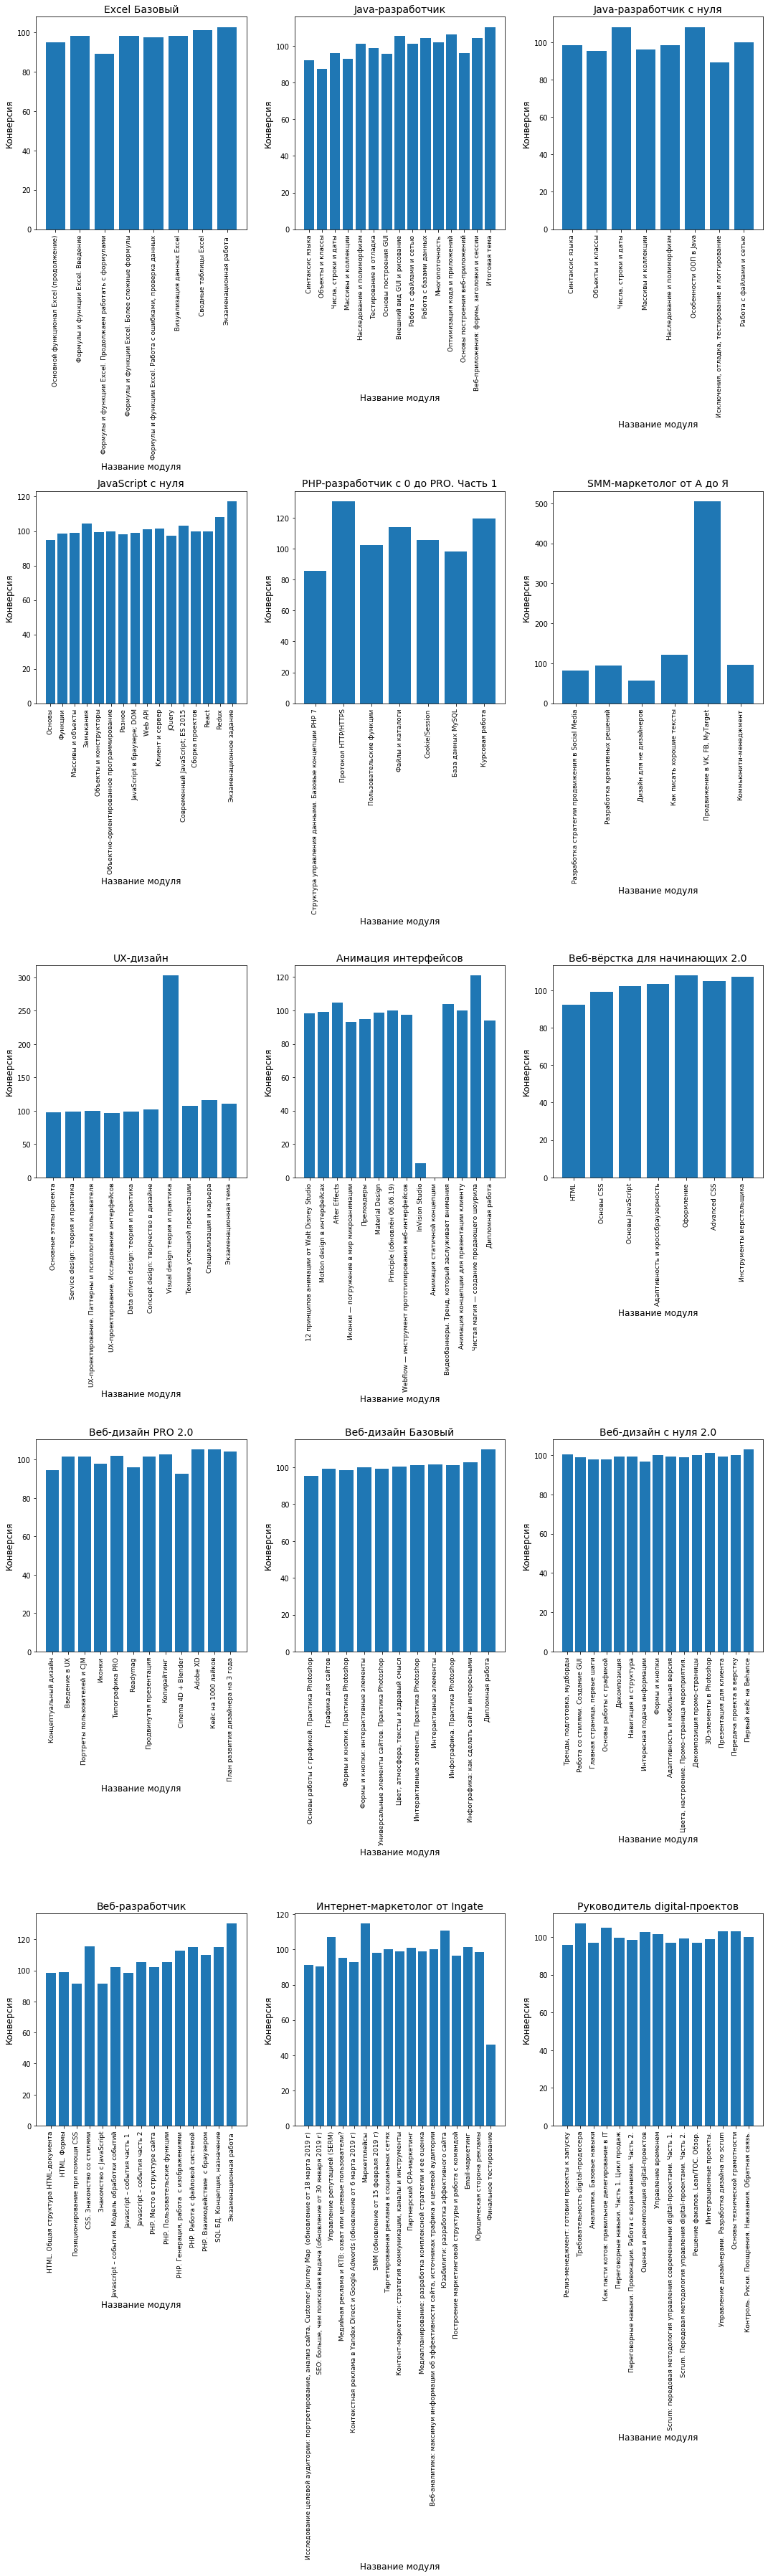

In [62]:
# Создание графика
f, ax = plt.subplots(5, 3, figsize=(15,50))
for ax, course in zip(ax.ravel(), group_keys):
    current_group = df_4_convers_result.get_group(course) # выбор текущей группы данных
    ax.bar(current_group['module_title'], current_group['conversion']) # Отрисовка графика
    # Подпись графика и осей
    ax.set_title(course, fontsize=14) # Подпись графика
    ax.set_xlabel('Название модуля', fontsize=12) # Подпись оси "x"
    ax.set_ylabel('Конверсия', fontsize=12) # Подпись оси "y"   
    # Формирование "х" тиков
    ax.set_xticks(current_group['module_title'])
    ax.set_xticklabels(current_group['module_title'], rotation='vertical', fontsize=9) 

plt.tight_layout() # разнесем графики для красивого отображение в фигуре
plt.show()

3. Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐

In [63]:
# Создадим функциюдля выбора цвета
def color_func(x):
    if x == 'Design':
        return 'red'
    elif x == 'Marketing':
        return 'blue'
    elif x == 'Development':
        return 'yellow'
    elif x == 'Business':
        return 'green'

In [64]:
# Приведем датафрейм к виду удобному для построения графика

# Создадим датафрейм
df_4_convers_result_for_figure = pd.DataFrame()
# В каждом курсе создадим столбец 'num_module_title', который будет содерщать номера и названия модулей
for group in group_keys:
    current_group = df_4_convers_result.get_group(group)
    current_group['num_module_title'] = current_group\
        .apply((lambda x: '{}_{}'.format(x['module_number'], x['module_title'])), axis=1)
    current_group = current_group.drop(['module_title', 'module_number'], axis=1) # удалим ненужные столбцы
    df_4_convers_result_for_figure = pd.concat([df_4_convers_result_for_figure, current_group], ignore_index=True)
# Добавим в датафрейм столбец с цветами (нужен для отображения на графике)
df_4_convers_result_for_figure['field_color'] = df_4_convers_result_for_figure['field'].apply(color_func)
# Сгруппируем
df_4_convers_result_for_figure_grouped = df_4_convers_result_for_figure.groupby(['field','title'])
# Положим кортежи (область, курс) в список
group_keys = list(df_4_convers_result_for_figure_grouped.groups.keys())

C:\Users\1\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


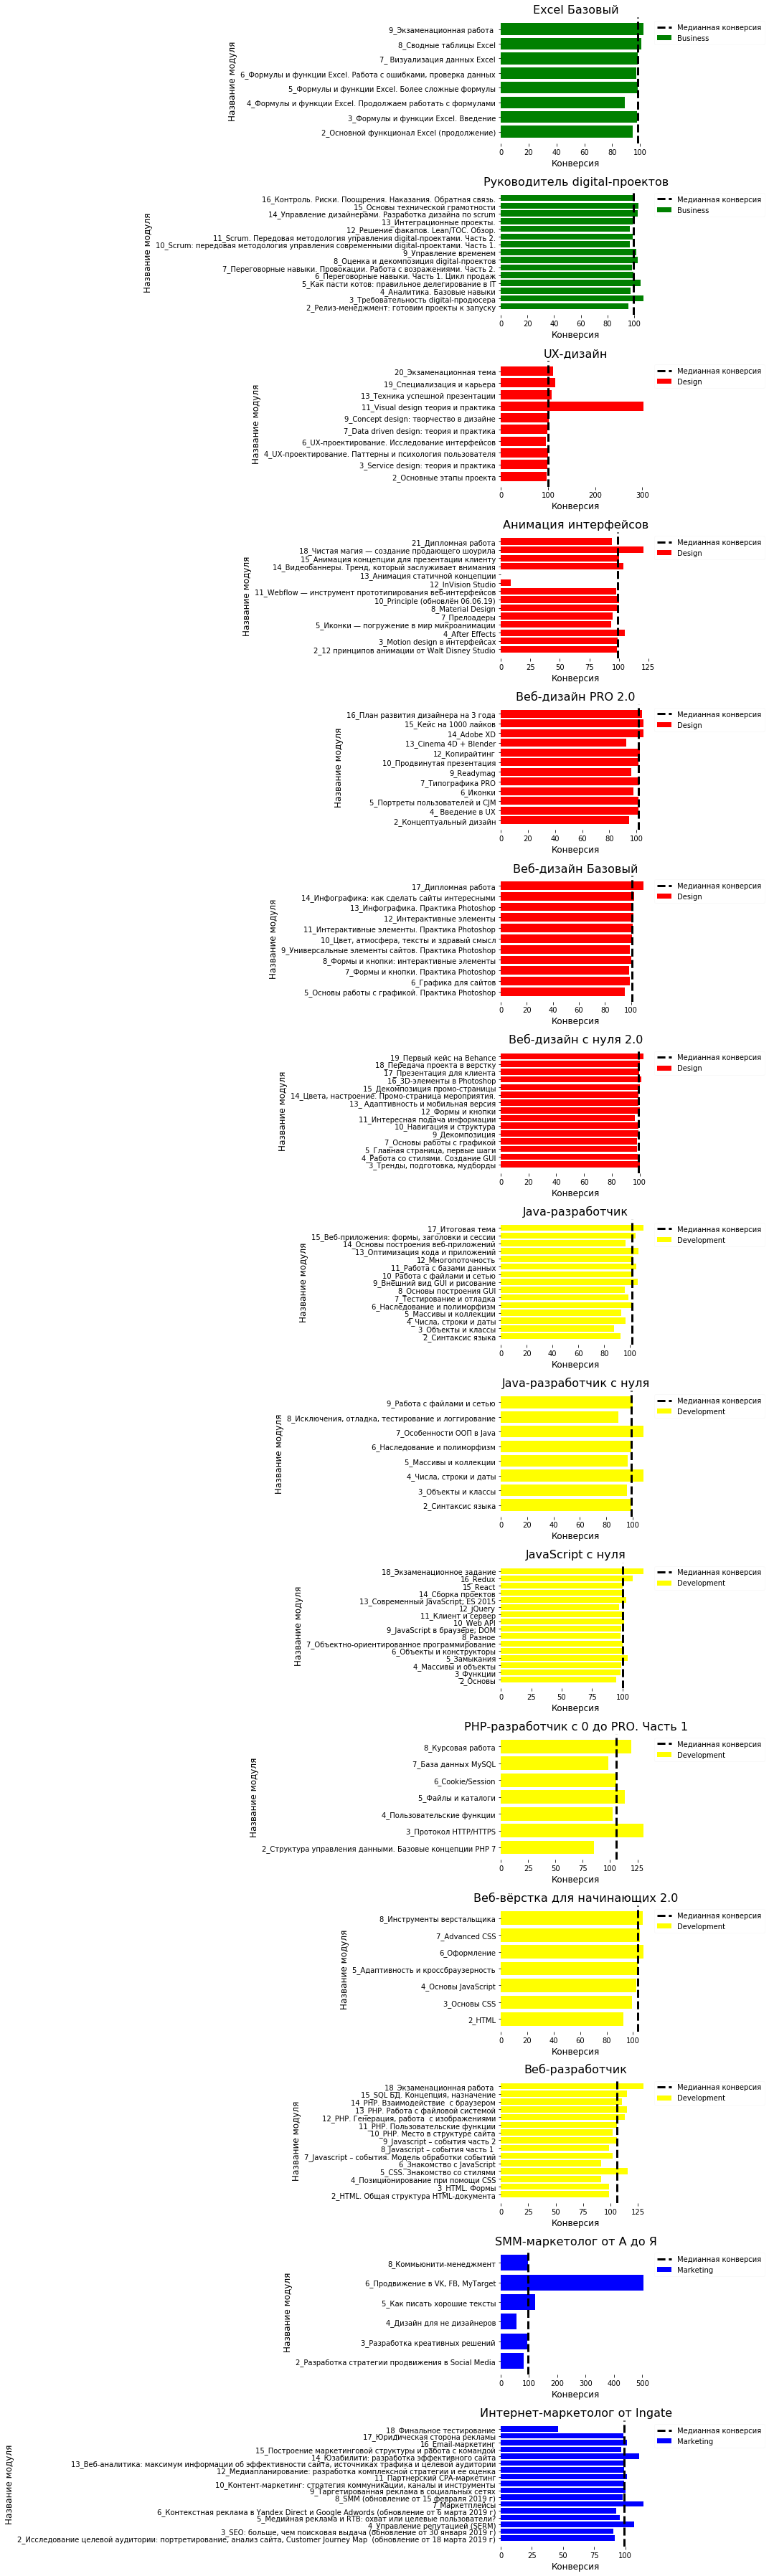

In [65]:
# Создание графика
f, ax = plt.subplots(15, 1, figsize=(15,50))
for ax, field_course in zip(ax.ravel(), group_keys):
    current_group = df_4_convers_result_for_figure_grouped.get_group(field_course) # выбор текущей группы данных
    ax.barh(current_group['num_module_title'], 
            current_group['conversion'], 
            color=current_group['field_color'], 
            label=field_course[0]) # Отрисовка графика
    # Создание линии медианы
#     median_current_group = df_4_convers_result_for_figure_median.get_group(field_course)
    ax.axvline(current_group['conversion'].median(), ls='--', color='k', lw=3, alpha=1, label='Медианная конверсия')
    # Подпись графика и осей
    ax.set_title(field_course[1], fontsize=16) # Подпись графика
    ax.set_xlabel('Конверсия', fontsize=12) # Подпись оси "x"
    ax.set_ylabel('Название модуля', fontsize=12) # Подпись оси "y"   
    ax.legend(bbox_to_anchor=(1, 1), framealpha=0.1) # Создадим легенду
    ax.set_frame_on(False) # Уберем рамки

plt.tick_params(labelsize=10) # Устрановим размеры подписей тиков
plt.tight_layout() # разнесем графики для красивого отображение в фигуре
plt.show()

По результатам, полученным в данной главе, можем сделать следующие выводы:
* Стоит отметить, очень часто встречается картина, что конверсия перехода на следующий модуль **больше 100%**. Это говорит о том, что есть небольшое количество людей, которые приступили к выполнению домашнего задания в модуле, не сдали его и перешли к освоению следующего модуля.
* Курс **Анимация интерфейсов**. Видим, что модуль "Invision Studio" является проблемным в данном курсе, студенты его пропускают или бросают. Из-за этого бар перехода на модуль "Анимация статичной концепции" недостоверный, проверив числовое показатели данного модуля, можем сказать, что на него переходят почти столько же студентов, сколько заканчивают "Webflow - инструмент прототипирования веб-интерфейсов".
* Курс **UX-дизайн**. Конверсия перехода на модуль "Visual design: теория и практика", выбивается из общей картины. Это говорит о том, что много людей не выполнили домашнюю работу в предыдущем модуле "Concept design: творчество в дизайне" и перешли на следующий. Разработчикам курса стоит обратить на это внимание и доработать проблемный модуль.
* Курс **SSM-маркетолог от А до Я**. Видим, что из общей картины выбивается модуль "Продвижение в VK, FB, MyTarget". Его начинают в 5 раз больше людей, чем заканчивают предыдущий модуль. Разработчикам модуля следует обратить внимание на предыдущий модель "Как писать хорошие тексты" и выяснить, почему люди бросают данный модуль. В дополнение к вышесказанному стоит обратить внимание на модуль "Дизайн для не дизайнеров" - его начали выполнять в 2 раза меньше людей, чем закончили предшествующий ему модуль.